# 4. Đặt câu hỏi và trả lời

In [5]:
#import các thứ viện cần thiết
import pandas as pd
import numpy as np
%pip install matplotlib-venn
from matplotlib_venn import venn3
import matplotlib.pyplot as plt
import seaborn as sns
# Vẽ biểu đồ 3 đe và gán nhãn dữ liệu
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
plt.style.use('ggplot')


Note: you may need to restart the kernel to use updated packages.


In [6]:
#đọc file csv
df = pd.read_csv('data/mxmh_survey_results_clean.csv')
df.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18,Spotify,4,No,No,No,Video game music,No,Yes,132,...,Rarely,Never,Rarely,Rarely,Very frequently,7,7,10,2,No effect
1,61,YouTube Music,2,Yes,No,Yes,Jazz,Yes,Yes,84,...,Sometimes,Sometimes,Never,Never,Never,9,7,3,3,Improve
2,18,Spotify,4,Yes,No,No,R&B,Yes,No,107,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7,2,5,9,Improve
3,18,Spotify,5,Yes,Yes,Yes,Jazz,Yes,Yes,86,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8,8,7,7,Improve
4,18,YouTube Music,3,Yes,Yes,No,Video game music,Yes,Yes,66,...,Rarely,Rarely,Never,Never,Sometimes,4,8,6,0,Improve


In [7]:
mental_healths = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

# Lọc ra các cột liên quan đến tần suất nghe nhạc
frequency_columns = [col for col in df.columns if col.startswith('Frequency')]

# Tạo DataFrame mới chỉ chứa dữ liệu tần suất nghe nhạc
df_frequency = df[frequency_columns]
# Tạo dữ liệu dataframe cho mental health
df_mh = df[mental_healths]

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Câu 1:  Vấn đề về sức khỏe tinh thần của những người tham gia như thế nào ? Vấn đề này có đáng loại không?  </b></font>

<font color="red"><b>Câu hỏi có lợi ích gì:  </b></font> <font color="red">Bộ dữ liệu nghiêm cứu về sự tấc động của âm nhạc đến với những vấn đề sức khỏe tâm lý như Lo lắng, trầm cảm, mất ngủ và rồi loạn cưỡng chế. Do việc xem những vấn đế này có tác động đến những người tham gia là điều đáng quan tâm. Liệu những vấn đề này có tiềm tàng trong chúng ta hay không và với tỉ lệ như thế nào? Nếu lớn quá thì có đáng tâm hay không? </font>


</div>

- Trước tiên, chúng ta xem xét sự phân bố của từng loại triệu chứng tâm lý trong từng loại bệnh.

Anxiety       5.821321
Depression    4.758258
Insomnia      3.671171
OCD           2.621622
dtype: float64


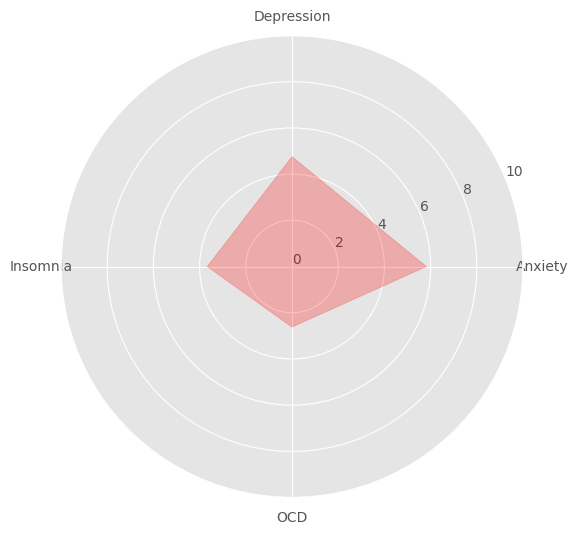

In [8]:
# Biểu đồ spider chart cho về mức độ trung bình của 4 triệu chứng metal health

# Tính trung bình của mỗi loại triệu chứng sức khỏe tâm thần
mental_health_means = df_mh.mean()
print(mental_health_means)
# Tạo một biểu đồ spider
labels = np.array(mental_health_means.index)
num_vars = len(labels)

# Tính toán góc của mỗi trục trong biểu đồ
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Đảm bảo biểu đồ spider bắt đầu và kết thúc ở cùng một điểm
values = mental_health_means.tolist()
values += values[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='red', alpha=0.25)

# Set các giá trị từ 0-10
ax.set_yticks(np.arange(0, 11, 2))  
ax.set_yticklabels(np.arange(0, 11, 2))

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)


plt.show()
# Lưu biểu đồ spider
fig.savefig('images/Q1-mental_health_spider.png', dpi=300)

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>
- Anxiety (Lo Âu): Điểm trung bình là 5.8, đây là điểm số cao nhất trong bốn loại bệnh. Điều này cho thấy tình trạng lo âu xuất hiện nhiều nhất hoặc nghiêm trọng nhất trong số các tình trạng được khảo sát. Người tham gia có xu hướng trải qua các triệu chứng lo âu ở mức độ trung bình đến khá cao.

- Depression (Trầm Cảm): Điểm trung bình là 4.75, nằm ở mức độ trung bình. Điều này chỉ ra rằng tình trạng trầm cảm cũng khá phổ biến trong nhóm người được khảo sát, nhưng không phổ biến hoặc nghiêm trọng bằng lo âu.

- Insomnia (Mất Ngủ): Điểm trung bình là 3.67, thấp hơn so với lo âu và trầm cảm. Điều này có thể cho thấy mức độ mất ngủ không quá nghiêm trọng hoặc không quá phổ biến so với hai tình trạng kia trong nhóm này.

- OCD (Rối Loạn Ám Ảnh Cưỡng Chế): Điểm trung bình thấp nhất là 2.62, cho thấy rằng trong số các tình trạng được khảo sát, OCD có vẻ ít phổ biến hoặc ít nghiêm trọng nhất.
</b></font>

<font color="red"><b>
=> Nhìn chung, dựa trên điểm trung bình, có thể thấy rằng lo âu và trầm cảm là hai vấn đề tâm lý chính mà nhóm người tham gia khảo sát gặp phải. Điều này có thể phản ánh nhu cầu chú trọng hơn vào việc điều trị và hỗ trợ cho những người đang chịu đựng lo âu và trầm cảm.
</b></font>


</div>

- Chọn ngưỡng 5 là ngưỡng để phân loại những người có triệu chứng tâm lý và những người không có triệu chứng tâm lý. Những người có điểm trung bình từ 5 trở lên sẽ được xem là có triệu chứng tâm lý, ngược lại những người có điểm dưới 5 sẽ được xem là không có triệu chứng tâm lý.

In [9]:
# Lọc những người tham gia khảo sát có điểm trên 5 ở các trường Anxiety, Depression, Insomnia, OCD
custom_colormap = ['skyblue', 'lightgreen', 'sandybrown', 'salmon']
df_anxiety = df[df['Anxiety'] > 5]
df_depression = df[df['Depression'] > 5]
df_insomnia = df[df['Insomnia'] > 5]
df_ocd = df[df['OCD'] > 5]

In [10]:
# Tạo các set cho mỗi loại bệnh
set_anxiety = set(df_anxiety.index)
set_depression = set(df_depression.index)
set_insomnia = set(df_insomnia.index)
set_ocd = set(df_ocd.index)
print(f'Số người phải mắc phải triệu chứng Lo lắng là: {len(set_anxiety)}')
print(f'Số người phải mắc phải triệu chứng Trầm cảm là: {len(set_depression)}')
print(f'Số người phải mắc phải triệu chứng Mất ngủ là: {len(set_insomnia)}')
print(f'Số người phải mắc phải triệu chứng Rối loạn ám ảnh là: {len(set_ocd)}')


Số người phải mắc phải triệu chứng Lo lắng là: 403
Số người phải mắc phải triệu chứng Trầm cảm là: 307
Số người phải mắc phải triệu chứng Mất ngủ là: 206
Số người phải mắc phải triệu chứng Rối loạn ám ảnh là: 116


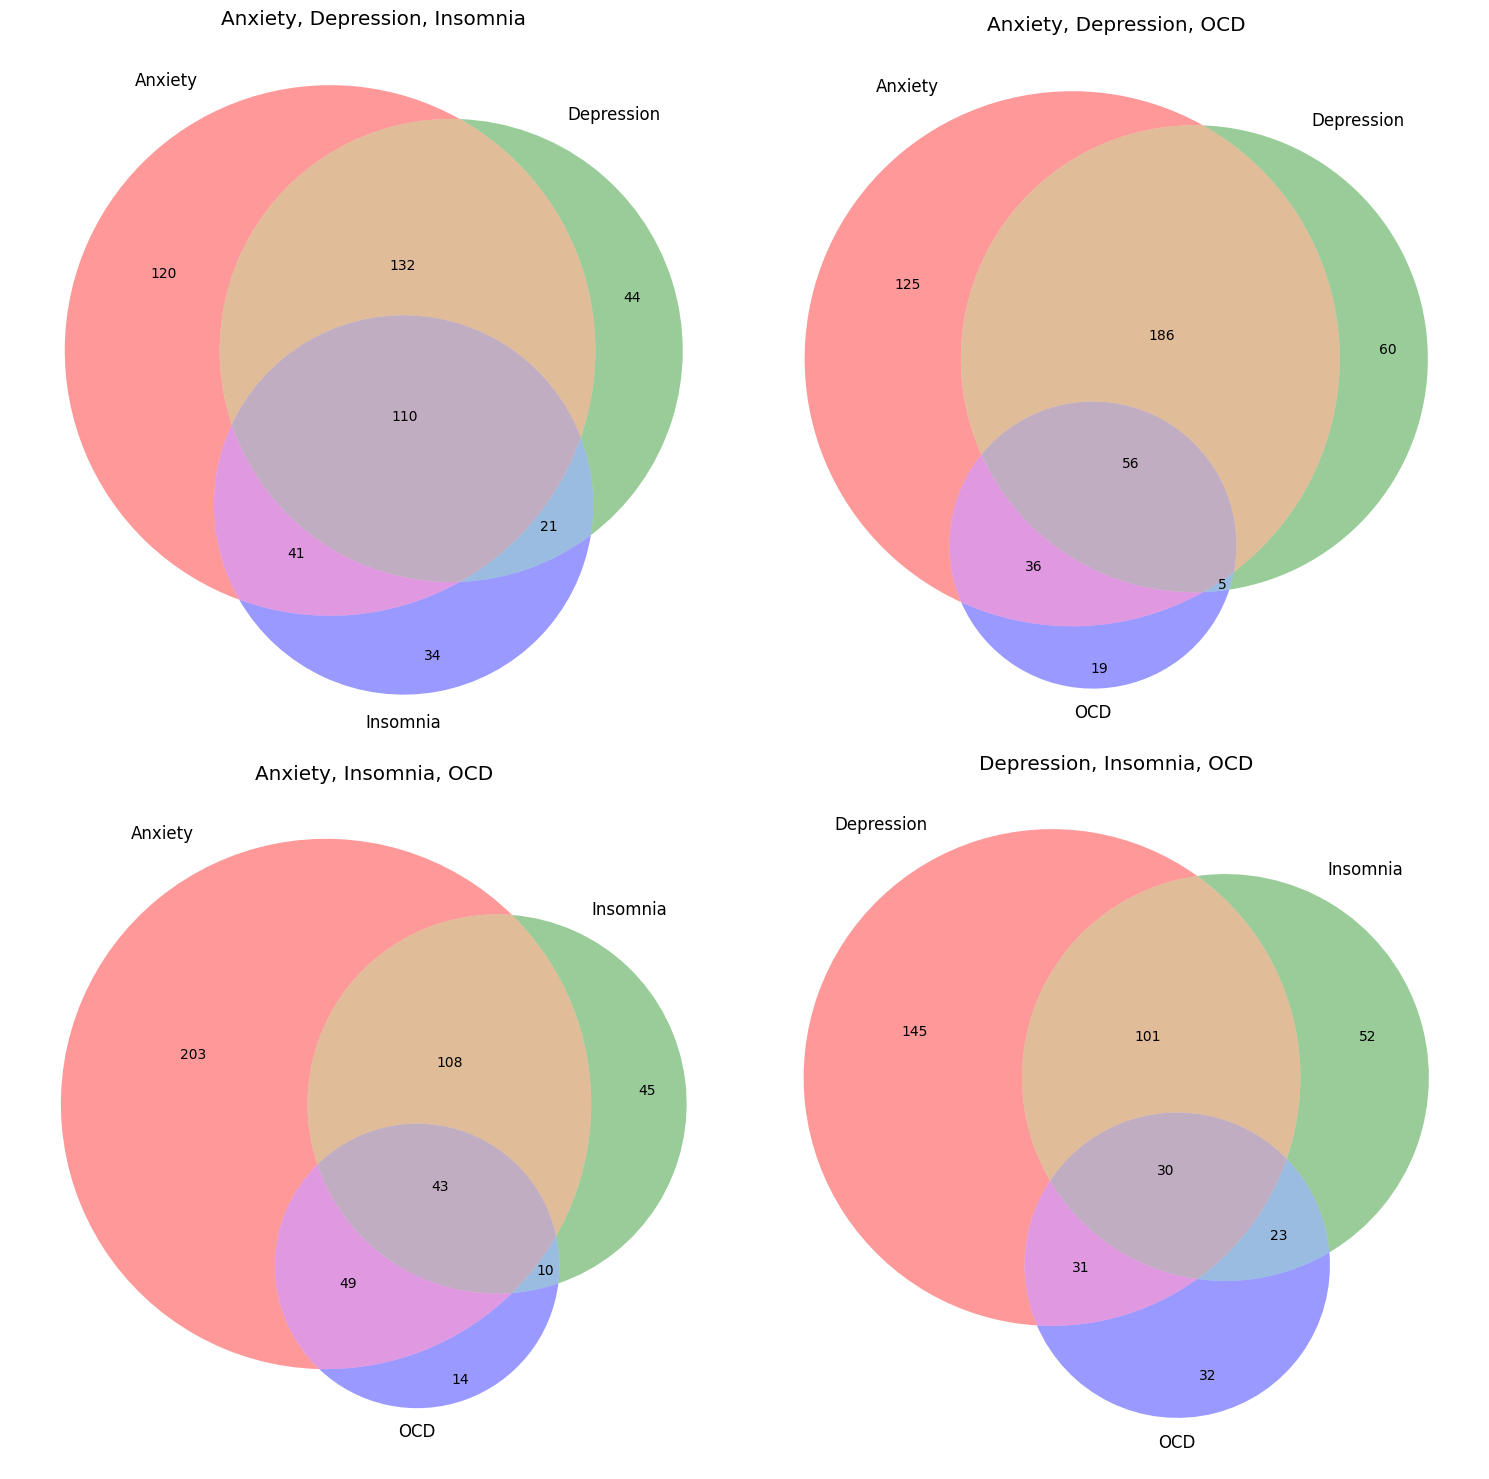

In [11]:
# Vẽ biểu đồ Venn để thấy sự giao nhau của các loại bệnh
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Biểu đồ Venn cho Anxiety, Depression, Insomnia
venn3([set_anxiety, set_depression, set_insomnia], ('Anxiety', 'Depression', 'Insomnia'), ax=axes[0, 0])
axes[0, 0].set_title('Anxiety, Depression, Insomnia')

# Biểu đồ Venn cho Anxiety, Depression, OCD
venn3([set_anxiety, set_depression, set_ocd], ('Anxiety', 'Depression', 'OCD'), ax=axes[0, 1])
axes[0, 1].set_title('Anxiety, Depression, OCD')

# Biểu đồ Venn cho Anxiety, Insomnia, OCD
venn3([set_anxiety, set_insomnia, set_ocd], ('Anxiety', 'Insomnia', 'OCD'), ax=axes[1, 0])
axes[1, 0].set_title('Anxiety, Insomnia, OCD')

# Biểu đồ Venn cho Depression, Insomnia, OCD
venn3([set_depression, set_insomnia, set_ocd], ('Depression', 'Insomnia', 'OCD'), ax=axes[1, 1])
axes[1, 1].set_title('Depression, Insomnia, OCD')

fig.savefig('images/Q1-venn_diagram.png', dpi=300)
plt.tight_layout()
plt.show()


<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>
- Từ các set ta có thể xác định được số người mắc phải triệu chứng tâm lý: khoảng 400 người mắc phải lo âu, 300 người mắc phải trầm cảm, 200 người mắc phải mất ngủ và hơn 100 người mắc phải rối loạn ám ảnh cưỡng chế.
- Sau đó là biểu đổ Venn để thể hiện mỗi liên hệ giữa các triệu chứng tâm lý. Nổi bật nhất là biểu đồ số 1 với Anxiety, Depression, Insomnia (Lo âu, Trầm cảm, Mất ngủ): Phần giao nhau lớn nhất là giữa Anxiety và Depression với 132 người, cho thấy có một số lượng lớn người tham gia mắc cả hai tình trạng này. 101 người mắc cả ba tình trạng, cũng là một con số đáng kể, chỉ ra rằng có một mối liên hệ mạnh mẽ giữa ba tình trạng này.
- Tương tự những biểu đồ còn cũng thể hiện mối liên hệ giữa các tình trạng tâm lý khác nhau. Nhưng tình trang tâm lý Anxiety và Depression nổi bật nhất, sau đó đến Insomnia và OCD chỉ có một số ít người tham gia mắc phải.
</b></font>

<font color="red"><b>
=> Tóm lại, các biểu đồ Venn này hữu ích trong việc trực quan hóa mức độ chồng chéo giữa các tình trạng tâm lý khác nhau trong một nhóm người. Chúng cho thấy rằng Anxiety và Depression có vẻ như là hai tình trạng phổ biến nhất và thường xuyên xuất hiện cùng nhau. 
</b></font>


</div>

In [12]:
# Phân tích tỉ lệ một người có thể mắc nhiều vấn đề tinh thần cùng lúc
four_issue = set_anxiety.intersection(set_depression, set_insomnia, set_ocd)

three_issue = set()
three_issue.update(set_anxiety.intersection(set_depression, set_insomnia))
three_issue.update(set_anxiety.intersection(set_depression, set_ocd))
three_issue.update(set_anxiety.intersection(set_insomnia, set_ocd))
three_issue.update(set_depression.intersection(set_insomnia, set_ocd))
three_issue.difference_update(four_issue)

two_issue = set()
two_issue.update(set_anxiety.intersection(set_depression))
two_issue.update(set_anxiety.intersection(set_insomnia))
two_issue.update(set_anxiety.intersection(set_ocd))
two_issue.update(set_depression.intersection(set_insomnia))
two_issue.update(set_depression.intersection(set_ocd))
two_issue.update(set_insomnia.intersection(set_ocd))
two_issue.difference_update(three_issue)
two_issue.difference_update(four_issue)

# Tạo tập hợp cho mỗi loại bệnh
one_issue_anxiety = set_anxiety.difference(set_depression, set_insomnia, set_ocd)
one_issue_depression = set_depression.difference(set_anxiety, set_insomnia, set_ocd)
one_issue_insomnia = set_insomnia.difference(set_anxiety, set_depression, set_ocd)
one_issue_ocd = set_ocd.difference(set_anxiety, set_depression, set_insomnia)
# Kết hợp các tập hợp
one_issue = one_issue_anxiety.union(one_issue_depression, one_issue_insomnia, one_issue_ocd)

# Tính toán số người mắc đúng n loại bệnh
total = len(df)
four_issue_count = len(four_issue)
three_issue_count = len(three_issue)
two_issue_count = len(two_issue)
one_issue_count = len(one_issue)

no_issue_count = total - four_issue_count - three_issue_count - two_issue_count - one_issue_count

print(f'Tổng số người tham gia khảo sát là {total}. Trong đó có\n- {no_issue_count} người khỏe mạnh, \
      \n- {one_issue_count} người chỉ mắc một vấn đề tinh thần,\n- {two_issue_count} người mắc hai vấn đề tinh thần, \
      \n- {three_issue_count} người mắc ba vấn đề tinh thần và \n- {four_issue_count} người mắc cả bốn vấn đề tinh thần.')

Tổng số người tham gia khảo sát là 666. Trong đó có
- 152 người khỏe mạnh,       
- 181 người chỉ mắc một vấn đề tinh thần,
- 175 người mắc hai vấn đề tinh thần,       
- 131 người mắc ba vấn đề tinh thần và 
- 27 người mắc cả bốn vấn đề tinh thần.


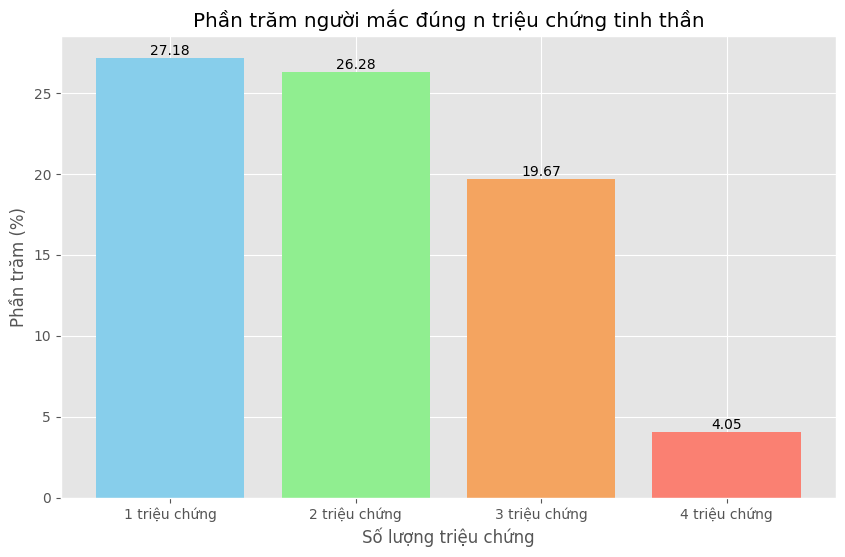

In [13]:
# Tính tỷ lệ phần trăm và vẽ biểu đồ
percent_four_issue = four_issue_count / total * 100
percent_three_issue = three_issue_count / total * 100
percent_two_issue = two_issue_count / total * 100
percent_one_issue = one_issue_count / total * 100


# Tạo biểu đồ cột
percentages = [percent_one_issue, percent_two_issue, percent_three_issue, percent_four_issue]
issues = ['1 triệu chứng', '2 triệu chứng', '3 triệu chứng', '4 triệu chứng']

plt.figure(figsize=(10, 6))
bars = plt.bar(issues, percentages, color= custom_colormap)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')


plt.xlabel('Số lượng triệu chứng')
plt.ylabel('Phần trăm (%)')
plt.title('Phần trăm người mắc đúng n triệu chứng tinh thần')
plt.savefig('images/Q1-percentages.png', dpi=300)
plt.show()

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Tổng kết  </b></font>

<font color="red"><b>Sự Phổ Biến của Các Triệu Chứng:</b></font> 
<font color="red">
Có một tỷ lệ đáng kể người tham gia khảo sát trải qua ít nhất một vấn đề về sức khỏe tinh thần, với một số lượng lớn người chỉ mắc một triệu chứng.
Tuy nhiên, có một số lượng không nhỏ người mắc hai triệu chứng, chỉ ra rằng sức khỏe tinh thần là một vấn đề đa diện và có thể ảnh hưởng đến người tham gia theo nhiều cách khác nhau. Có đến hơn 75% số người tham gia mắc ít nhất một triệu chứng về tình thần. Điều này phản ánh đây là vấn đề quan tâm của sức khỏe tinh thần.
</font>

<font color="red"><b>Mức Độ Nghiêm Trọng:</b></font> 
<font color="red">
Dựa vào điểm trung bình của từng loại bệnh, Anxiety (Lo âu) và Depression (Trầm cảm) có điểm số cao hơn so với Insomnia (Mất ngủ) và OCD (Rối loạn ám ảnh cưỡng chế), cho thấy rằng lo âu và trầm cảm có thể là những vấn đề sức khỏe tinh thần phổ biến và nghiêm trọng hơn trong nhóm này.
</font>

<font color="red"><b>Sự Chồng Chéo Của Các triệu chứng tinh thần:</b></font> 
<font color="red">
Biểu đồ Venn cho thấy có sự chồng chéo đáng kể giữa các tình trạng tâm lý. Điều này phản ánh thực tế phức tạp của sức khỏe tinh thần, nơi một người có thể trải qua nhiều vấn đề cùng một lúc, và những vấn đề này thường có mối liên quan chặt chẽ với nhau.
</font>
</div>

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Câu 2:  Phân tích những lựa chọn, sở thích nghe nhạc của những người tham gia khảo sát khi các triệu chứng tinh thần diễn ra thường xuyên hơn (> 5 ở thang 10)  </b></font>

<font color="red"><b>Câu hỏi có lợi ích gì:  </b></font> <font color="red">Việc phân tích những yếu tố tác động đến sức khỏe tinh thân giúp chúng ta có cái nhìn chi tiết hơn về vấn để tinh thần của mọi người. Nhìn nhận việc nghe nhạc tác động đến sức khỏe ở nhiều góc cạnh khác nhau, tìm ra những khác biệt của những người các triệu chứng về sức khỏe tinh thần, để kip thời phát hiện và chữa trị sớm nhất</font>

</div>

- Sô giờ nghe nhạc của họ trung bình của họ là bao nhiêu, và có chệnh lệch gì so với những người còn lại không?

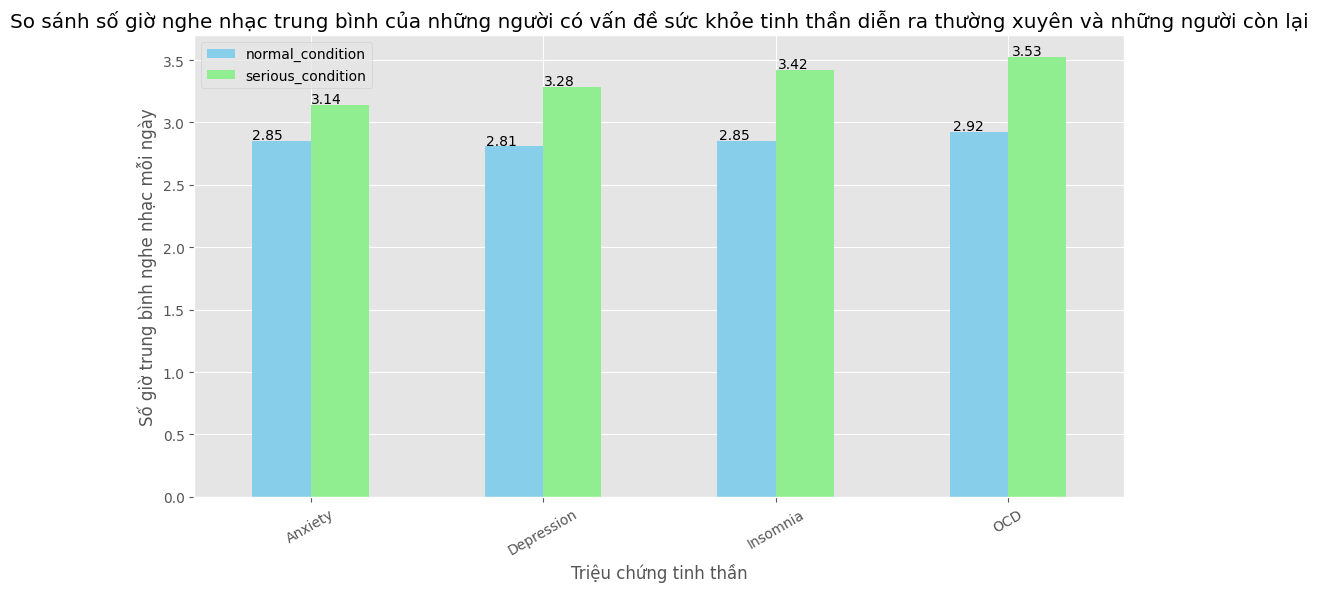

In [14]:
# Biểu đồ cột đôi để so sánh số giời nghe nhạc trung bình của những người này so với những người còn lại

# Tạo dictionary để lưu trữ kết quả
average_hours = {'normal_condition': [], 'serious_condition': []}

# Tính trung bình số giờ nghe nhạc cho mỗi nhóm và mỗi bệnh lý
for mental_health in mental_healths:
    df_serious = df[df[mental_health] > 5]
    df_normal = df[df[mental_health] <= 5]

    average_hours['normal_condition'].append(df_normal['Hours per day'].mean())
    average_hours['serious_condition'].append(df_serious['Hours per day'].mean())

# Chuyển dictionary thành DataFrame
average_hours_df = pd.DataFrame(average_hours, index=mental_healths)

# Vẽ biểu đồ
ax = average_hours_df.plot(kind='bar', figsize=(12, 6), color = custom_colormap)

for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.xlabel('Triệu chứng tinh thần')
plt.xticks(rotation=30)
plt.ylabel('Số giờ trung bình nghe nhạc mỗi ngày')
plt.title('So sánh số giờ nghe nhạc trung bình của những người có vấn đề sức khỏe tinh thần diễn ra thường xuyên và những người còn lại')
plt.savefig('images/Q2-diferrence-average_hours.png', dpi=300)
plt.show()

- Có thể thấy trung bình số giờ nghe nhạc trong ngày của các nhóm người này cao hơn so với trung bình của tất cả mọi người nhưng không đáng kể
- Tiếp theo chúng ta tìm hiểu tần suất nghe nhạc của những người này ở từng thể loại nhạc

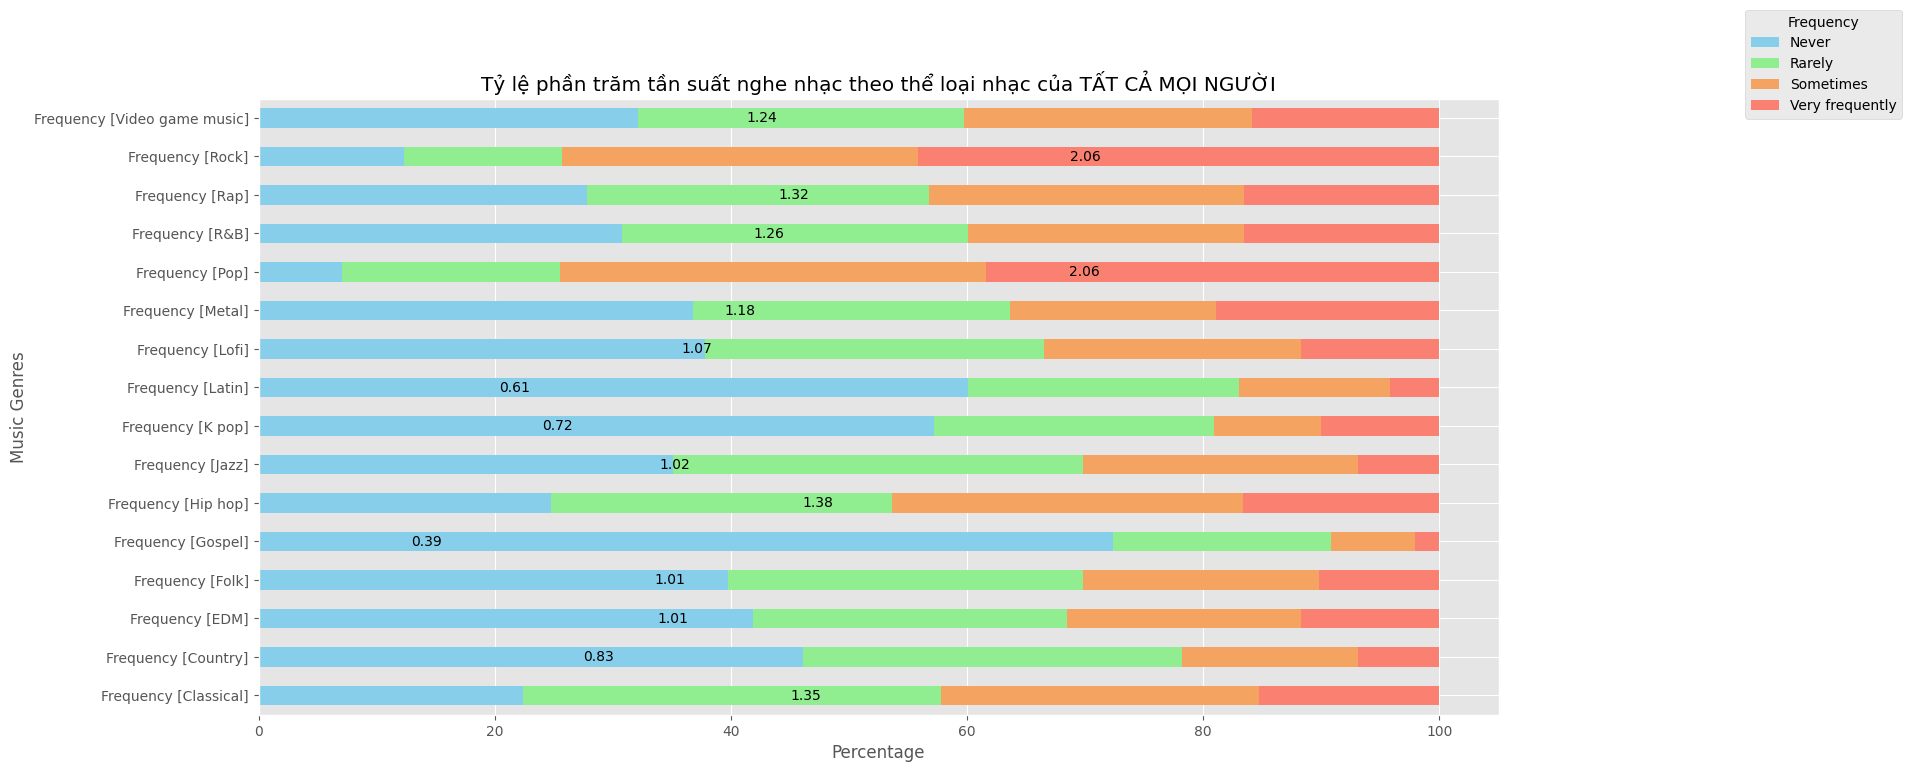

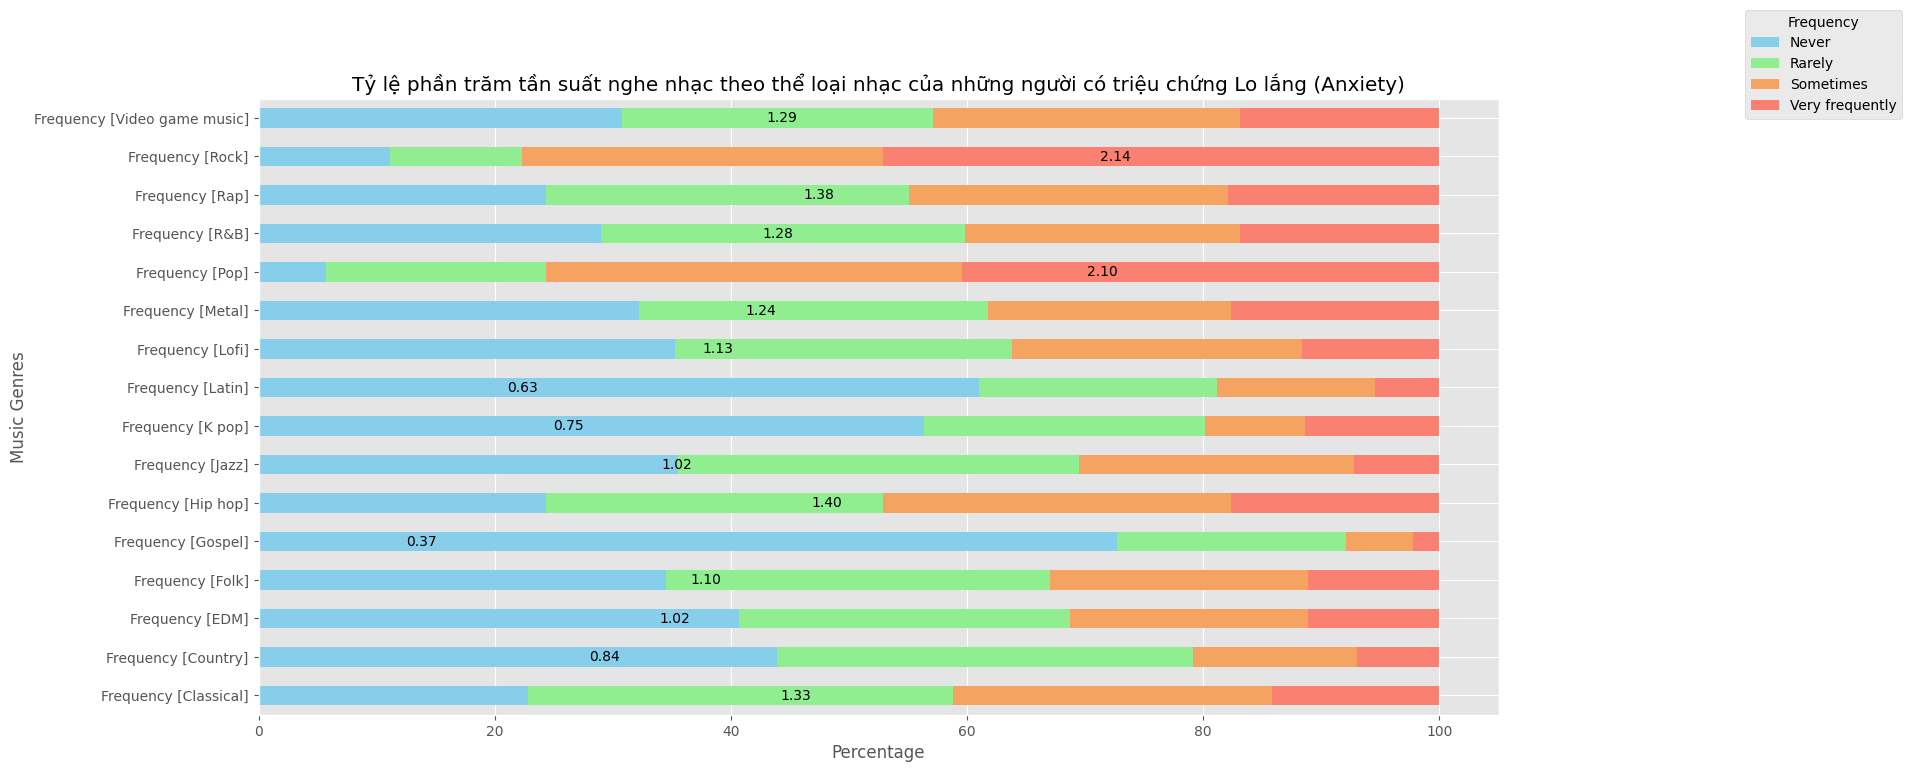

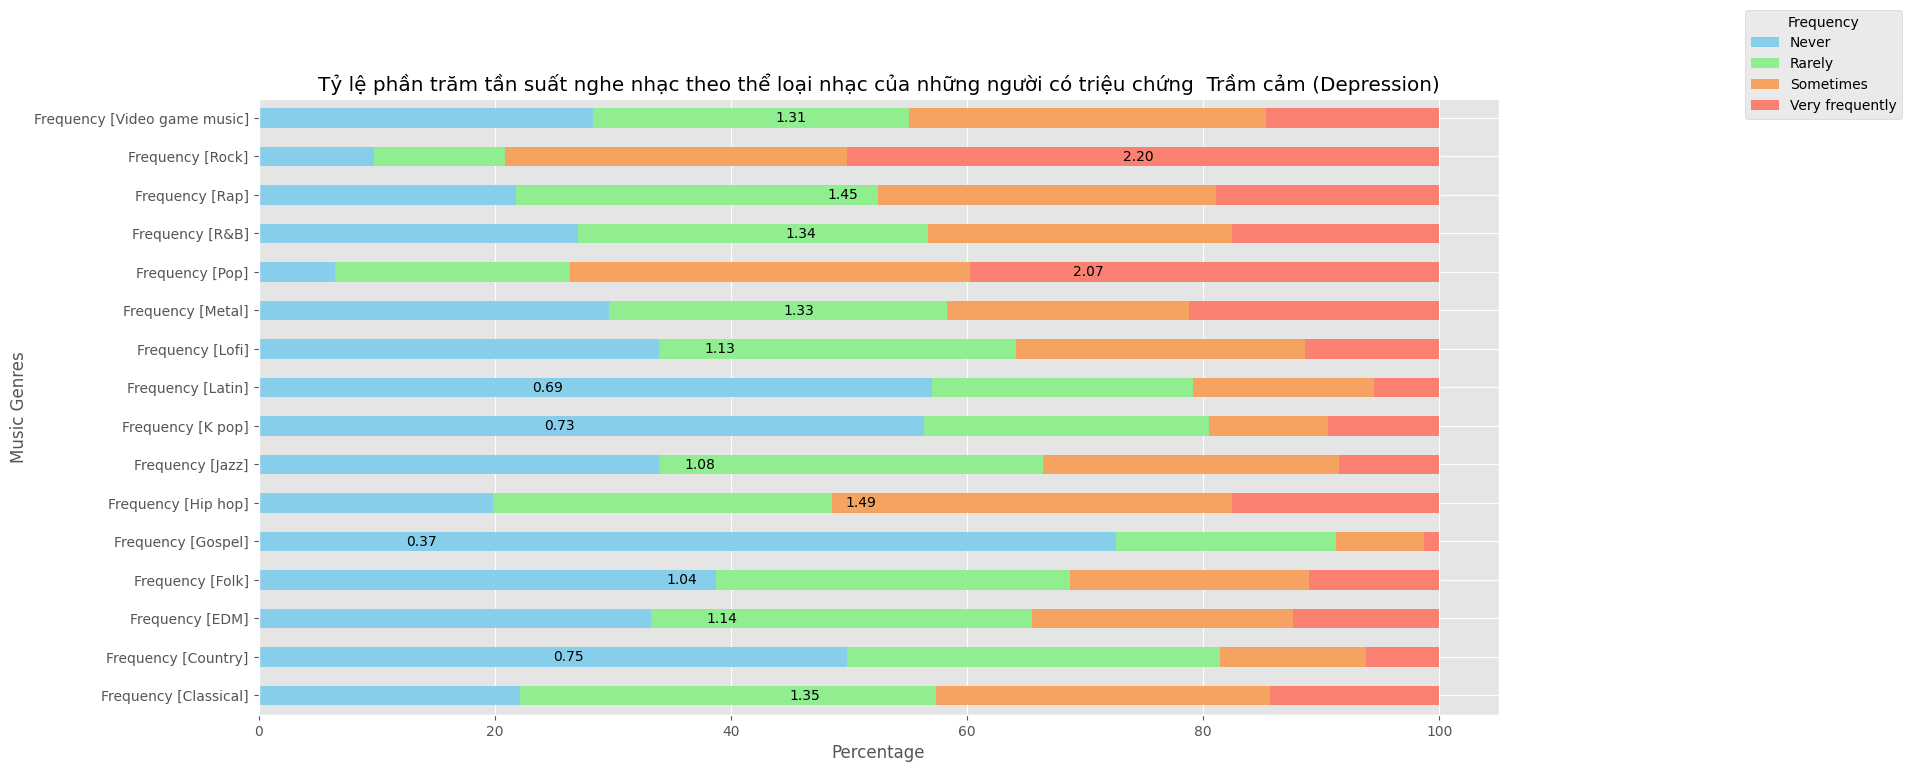

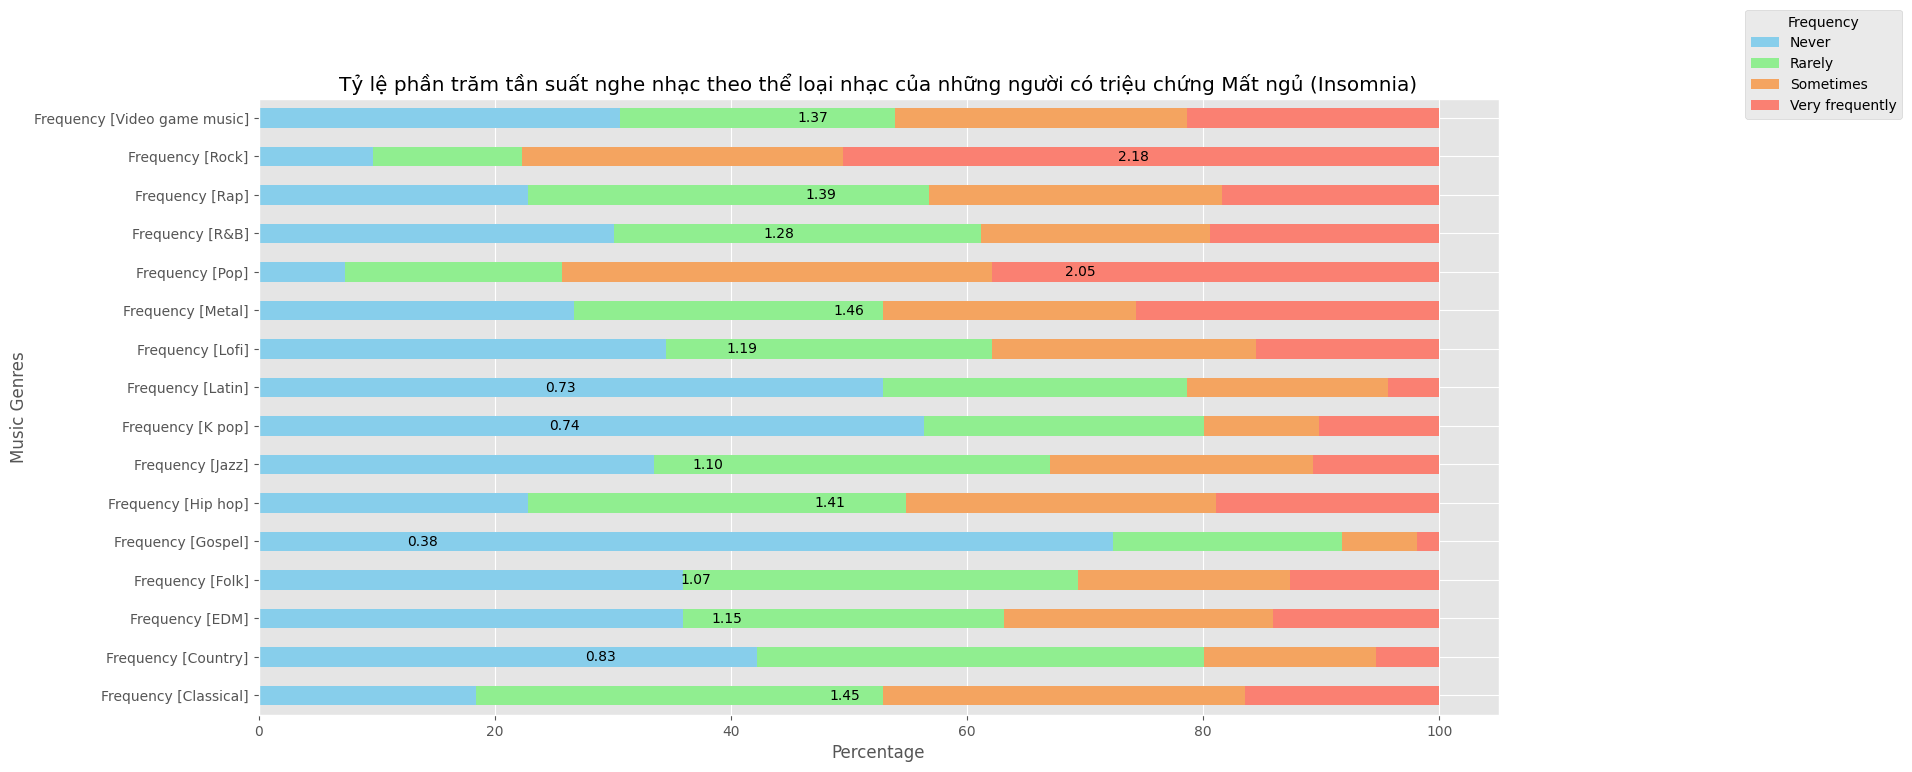

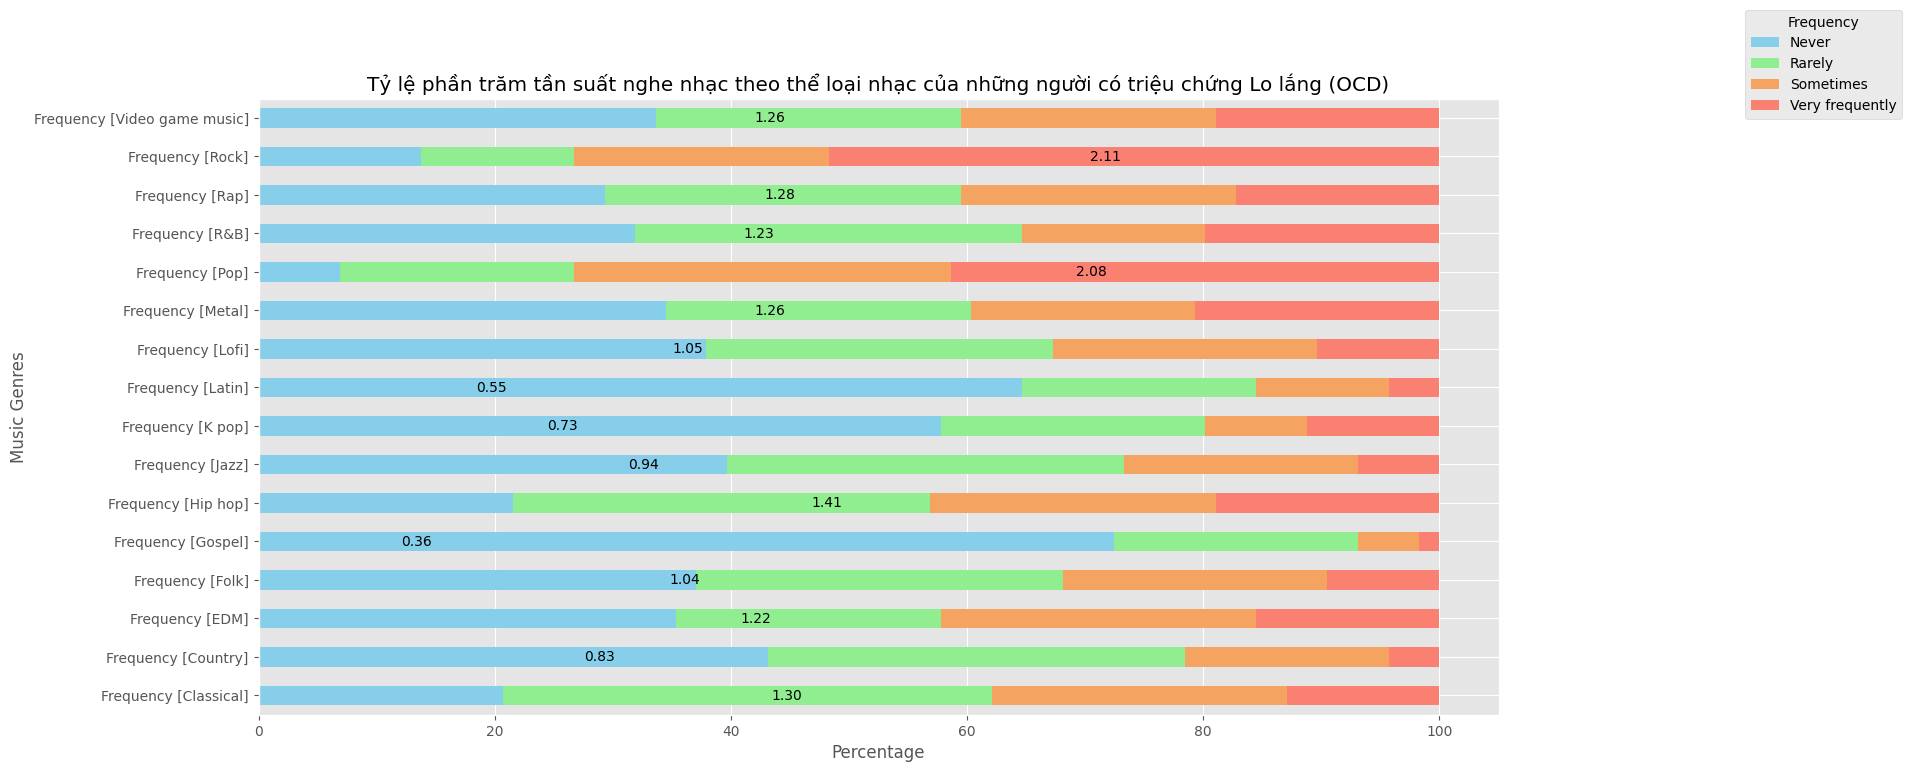

In [15]:
# Biểu đồ stack bar chart horizontal 100% để thể hiện % trăn của tần suất nghe nhạc['Nerver', 'Rarely', 'Sometimes', 'Very frequently'] theo từng thể loại nhạc


# Tạo một hàm để tính tỷ lệ phần trăm tần suất nghe nhạc cho mỗi thể loại
def calculate_frequency_percentages(df):
    frequency_counts = df[frequency_columns].apply(pd.Series.value_counts).fillna(0)
    frequency_percentages = frequency_counts.div(frequency_counts.sum()).multiply(100)
    return frequency_percentages

# Tính tỷ lệ phần trăm cho mỗi loại bệnh
percentages_anxiety = calculate_frequency_percentages(df_anxiety)
percentages_depression = calculate_frequency_percentages(df_depression)
percentages_insomnia = calculate_frequency_percentages(df_insomnia)
percentages_ocd = calculate_frequency_percentages(df_ocd)
# Tính trung bình cả bộ dũ liệu
percentages_all = calculate_frequency_percentages(df)


# Mapping giá trị tần suất thành số
frequency_mapping = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3}

# Áp dụng mapping cho DataFrame
df_mapped = df.copy()
for col in frequency_columns:
    df_mapped[col] = df_mapped[col].map(frequency_mapping)

# Tính trung bình cho từng loại bệnh
average_anxiety = df_mapped.loc[df['Anxiety'] > 5, frequency_columns].mean()
average_depression = df_mapped.loc[df['Depression'] > 5, frequency_columns].mean()
average_insomnia = df_mapped.loc[df['Insomnia'] > 5, frequency_columns].mean()
average_ocd = df_mapped.loc[df['OCD'] > 5, frequency_columns].mean()
average_all = df_mapped[frequency_columns].mean()

# Tạo biểu đồ với trung bình số được hiển thị bên cạnh
def plot_frequency_percentages(percentages, averages, title, colors=custom_colormap, path = None):
    fig, ax = plt.subplots(figsize=(16, 8))

    # Vẽ stacked bar chart
    percentages.T.plot(kind='barh', stacked=True, ax=ax, color=colors, legend=False)

    # Thêm các giá trị trung bình
    for i, genre in enumerate(averages.index):
        ax.text(averages[genre] * 100 / 3, i, f'{averages[genre]:.2f}', va='center')

    ax.set_xlabel('Percentage')
    ax.set_ylabel('Music Genres')
    ax.set_title(title)
    fig.legend(title='Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
    fig.savefig(path, dpi=300)
    plt.show()
    
    
    
plot_frequency_percentages(percentages_all,average_all, 'Tỷ lệ phần trăm tần suất nghe nhạc theo thể loại nhạc của TẤT CẢ MỌI NGƯỜI', path = 'images/Q2-percentages-all.png') 
plot_frequency_percentages(percentages_anxiety,average_anxiety, 'Tỷ lệ phần trăm tần suất nghe nhạc theo thể loại nhạc của những người có triệu chứng Lo lắng (Anxiety)', path = 'images/Q2-percentages-anxiety.png')
plot_frequency_percentages(percentages_depression,average_depression, 'Tỷ lệ phần trăm tần suất nghe nhạc theo thể loại nhạc của những người có triệu chứng  Trầm cảm (Depression)', path = 'images/Q2-percentages-depression.png')
plot_frequency_percentages(percentages_insomnia,average_insomnia, 'Tỷ lệ phần trăm tần suất nghe nhạc theo thể loại nhạc của những người có triệu chứng Mất ngủ (Insomnia)', path = 'images/Q2-percentages-insomnia.png')
plot_frequency_percentages(percentages_ocd, average_ocd,'Tỷ lệ phần trăm tần suất nghe nhạc theo thể loại nhạc của những người có triệu chứng Lo lắng (OCD)', path = 'images/Q2-percentages-ocd.png')

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>
- Tần suất trung bình  tất cả mọi người so với Người Có Lo Âu: Trong biểu đồ dành cho những người có triệu chứng lo âu, có thể thấy rõ ràng tần suất nghe hầu hết các thể loại nhạc đều tăng lên, đặc biệt là Rock và Pop, cho thấy những người lo âu có thể sử dụng việc nghe nhạc như một phương pháp tự giúp bản thân nhiều hơn người bình thường.

- Tần suất trung bình  tất cả mọi người so với Người Có Trầm Cảm: Những người có trầm cảm cho thấy tần suất nghe nhạc Metal và Rock cao đáng kể. Điều này có thể ám chỉ một sở thích đối với các thể loại có thể phản ánh hoặc ảnh hưởng đến tình trạng cảm xúc của họ.

- Tần suất trung bình  tất cả mọi người với Người Có Mất Ngủ: Những người mất ngủ nghe nhạc video game và Metal với tần suất cao hơn. Điều này có thể chỉ ra rằng họ sử dụng nhạc như một phương tiện để gây ngủ hoặc quản lý căng thẳng liên quan đến tình trạng mất ngủ.

- Tần suất trung bình  tất cả mọi người so với Người Có OCD (Rối Loạn Ám Ảnh Cưỡng Chế): Tần suất nghe nhạc Rap và Pop cao hơn đáng kể ở những người có OCD. Có thể nhịp điệu và tính dự đoán trong các thể loại này h resonates hơn với những người nghe có OCD.

- Xuyên suốt tất cả các biểu đồ, nhạc Gospel thường có tần suất nghe thấp hơn ở những người có các điều kiện này so với dân số tổng thể, có thể cho thấy rằng thể loại này ít được sử dụng hoặc ít hiệu quả như một chiến lược đối phó cho những nhóm cụ thể này.
</b></font>

<font color="red"><b>
=> Các biểu đồ cho thấy những người có vấn đề sức khỏe tâm thần có thể có thói quen nghe nhạc khác biệt so với dân số chung, có khả năng sử dụng nhạc nhiều hơn như một công cụ trị liệu hoặc như một phản ánh của tình trạng cảm xúc của họ
</b></font>


</div>

- Họ thường yêu thích những thể loại nhạc nào?

<Figure size 1400x800 with 0 Axes>

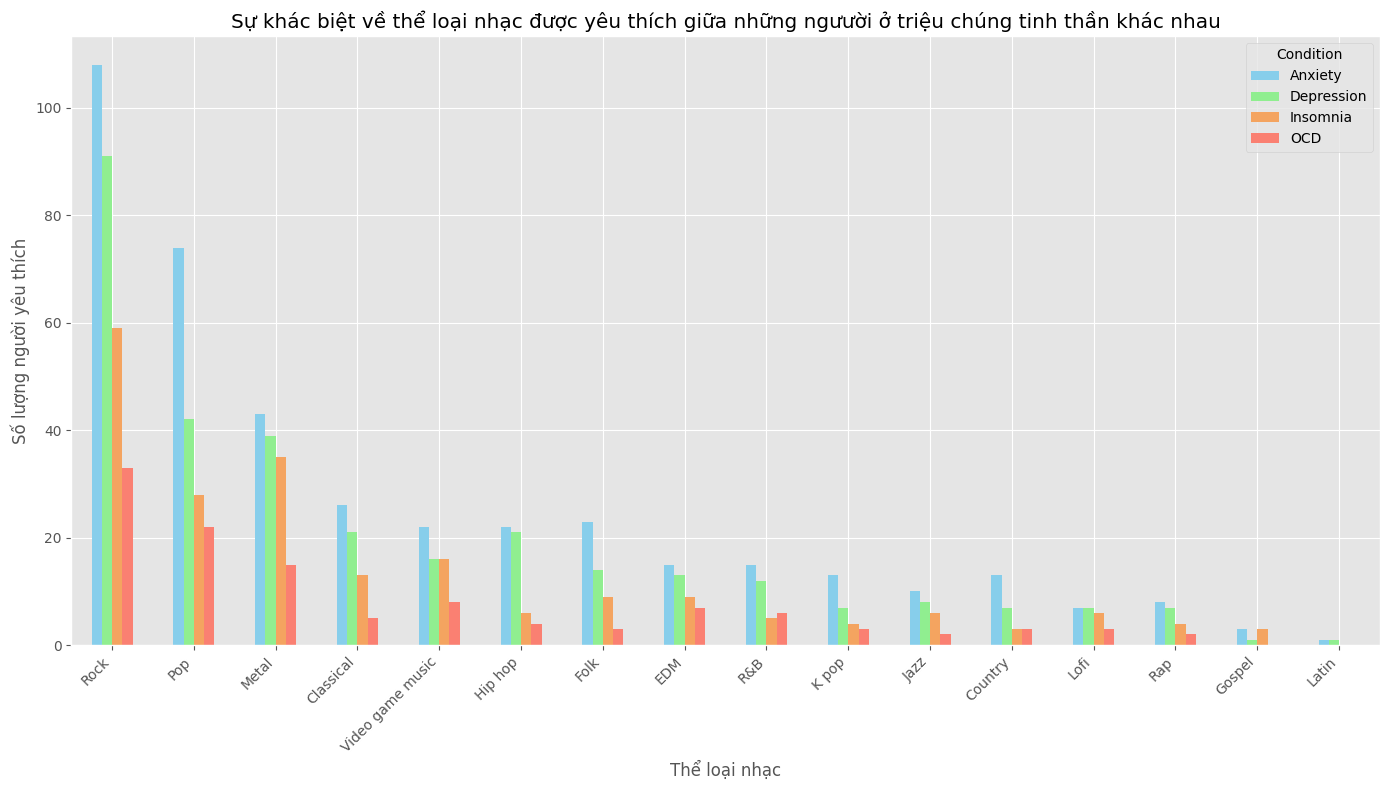

In [16]:
# Xác định thể loại nhạc được yêu thích nhất 
genres = df['Fav genre'].unique()

# Tạo DataFrame mới để lưu trữ kết quả
genre_counts = pd.DataFrame(index=genres)

# Tính số lượng người yêu thích mỗi thể loại nhạc cho từng loại bệnh
genre_counts['Anxiety'] = df_anxiety['Fav genre'].value_counts()
genre_counts['Depression'] = df_depression['Fav genre'].value_counts()
genre_counts['Insomnia'] = df_insomnia['Fav genre'].value_counts()
genre_counts['OCD'] = df_ocd['Fav genre'].value_counts()

# Điền các giá trị NaN bằng 0
genre_counts = genre_counts.fillna(0)

# Thêm cột tổng số lượng để tính số lượng người yêu thích mỗi thể loại nhạc để sắp xếp lại dữ liệu theo dữ liệu
genre_counts['Total'] = genre_counts.sum(axis=1)
genre_counts = genre_counts.sort_values(by='Total', ascending=False)
genre_counts = genre_counts.drop('Total', axis=1)

# Vẽ biểu đồ
plt.figure(figsize=(14, 8))
genre_counts.plot(kind='bar', figsize=(14, 8), color = custom_colormap)
plt.title('Sự khác biệt về thể loại nhạc được yêu thích giữa những ngưười ở triệu chúng tinh thần khác nhau')
plt.xlabel('Thể loại nhạc')
plt.ylabel('Số lượng người yêu thích')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Condition')
plt.tight_layout()
plt.savefig('images/Q2-genre_counts.png', dpi=300)
plt.show()


<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>
- Thể loại Rock dường như là thể loại được yêu thích nhất trong số các nhóm có các triệu chứng tâm thần, với số lượng người yêu thích đáng kể trong mỗi nhóm.
- Pop và Metal cũng là những thể loại được nhiều người yêu thích, đặc biệt là trong nhóm người có triệu chứng lo âu và trầm cảm.
- Nhạc cổ điển và nhạc video game có số lượng người yêu thích tương đối ổn định giữa các nhóm, nhưng không phải là thể loại được yêu thích nhất.
- Những thể loại như Hip hop, Folk, EDM, R&B, K-pop, và Jazz có số lượng người yêu thích ít hơn so với Rock, Pop, và Metal.
- Thể loại Country, Lofi, Rap, Gospel, và Latin có số lượng người yêu thích ít nhất trong các nhóm này.
</b></font>
</div>

- Việc nghe nhạc như thế này có giúp cải thiện tinh thần của họ không?

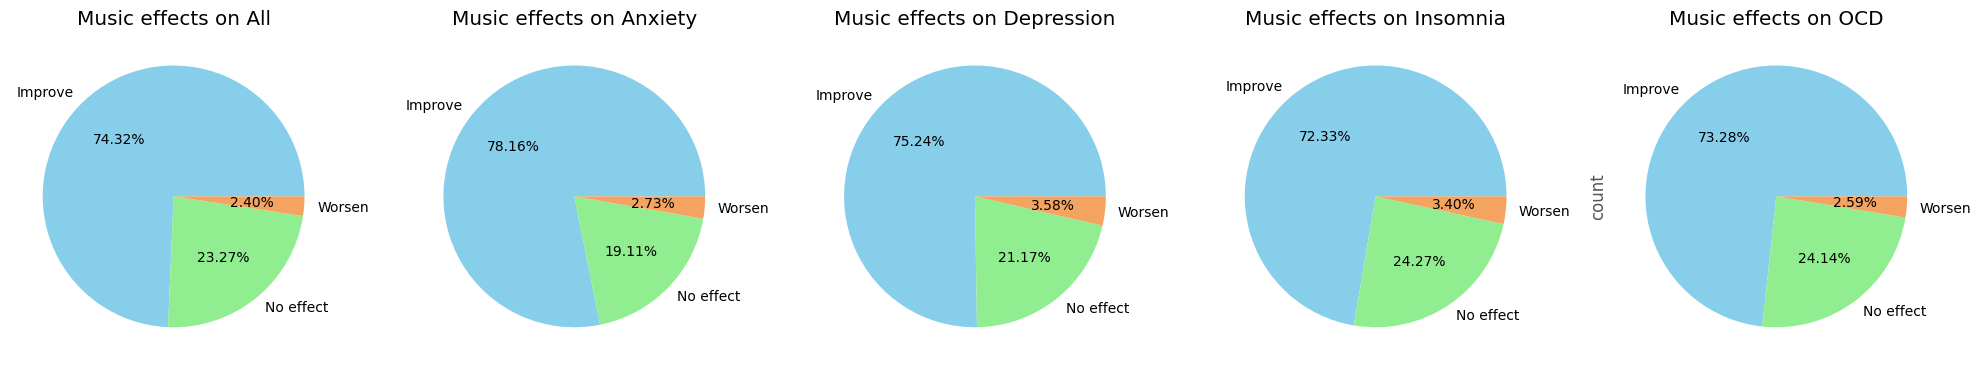

In [17]:
df_axiety_effect = df_anxiety['Music effects'].value_counts()
df_depression_effect = df_depression['Music effects'].value_counts()
df_insomnia_effect = df_insomnia['Music effects'].value_counts()
df_ocd_effect = df_ocd['Music effects'].value_counts()
df_all_effect = df['Music effects'].value_counts()

# Vẽ biểu đồ tròn cho tần suất nghe nhạc ảnh hưởng đến các triệu chứng
fig, axes = plt.subplots(1, 5, figsize=(20, 5))  
# Biểu đồ tròn cho Tất cả
df_all_effect.plot(kind='pie', autopct='%.2f%%', ax=axes[0], title='Music effects on All', colors=custom_colormap)
axes[0].set_ylabel('')
# Biểu đồ tròn cho Anxiety
df_axiety_effect.plot(kind='pie', autopct='%.2f%%', ax=axes[1], title='Music effects on Anxiety', colors=custom_colormap)
axes[0].set_ylabel('')

# Biểu đồ tròn cho Depression
df_depression_effect.plot(kind='pie', autopct='%.2f%%', ax=axes[2], title='Music effects on Depression', colors=custom_colormap)
axes[1].set_ylabel('')

# Biểu đồ tròn cho Insomnia
df_insomnia_effect.plot(kind='pie', autopct='%.2f%%', ax=axes[3], title='Music effects on Insomnia', colors=custom_colormap)
axes[2].set_ylabel('')

# Biểu đồ tròn cho OCD
df_ocd_effect.plot(kind='pie', autopct='%.2f%%', ax=axes[4], title='Music effects on OCD', colors=custom_colormap)
axes[3].set_ylabel('')

# plt.savefig('images/Q2-music_effects.png', dpi=300)
plt.tight_layout()
plt.show()

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>
Nhìn chung, những biểu đồ này cho thấy rằng đa số mọi người, bao gồm cả những người có triệu chứng bệnh cụ thể, đều cảm thấy có lợi khi nghe nhạc. Tuy nhiên, tỷ lệ những người cảm thấy xấu đi khi nghe nhạc tăng lên đôi chút trong các nhóm có các triệu chứng bệnh, điều này có thể phản ánh sự cần thiết của việc lựa chọn đúng loại nhạc cho từng cá nhân và tình trạng sức khỏe tâm thần cụ thể của họ.
</b></font>
</div>

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Tổng kết nghiên cứu  </b></font>

<font color="red"><b>Câu hỏi: </b></font>
 <font color="red">Phân tích so sánh sự ảnh hưởng của âm nhạc đối với cảm xúc và tình trạng tâm thần của mọi người, cũng như những người đang trải qua các triệu chứng tâm thần như lo âu, trầm cảm, mất ngủ và OCD.</font>

<font color="red"><b>Trả lời :</b></font> 
<font color="red"> 

Từ biểu đồ tần suất nghe nhạc, chúng đã phát hiện ra rằng:

- Người có triệu chứng lo âu và trầm cảm có xu hướng nghe nhạc Rock và Pop nhiều hơn.
- Người mất ngủ có xu hướng nghe nhạc video game và Metal nhiều hơn.
- Người có OCD nghe nhạc Rap và Pop nhiều hơn so với mức trung bình.

Từ biểu đồ sở thich âm nhạc của những người có triệu chứng bệnh ta thấy: ở thích âm nhạc cá nhân có liên quan đến triệu chứng tâm thần và có thể phản ánh cách thức mà mỗi người đối phó với tình trạng sức khỏe tâm thần của họ. Thể loại Rock và Pop được yêu thích rộng rãi trong tất cả các nhóm, trong khi các thể loại khác như Metal có thể được ưa chuộng bởi những người trải qua trạng thái cảm xúc sâu sắc hơn. Sự đa dạng trong sở thích âm nhạc cho thấy việc lựa chọn âm nhạc để hỗ trợ sức khỏe tâm thần là một trải nghiệm rất cá nhân và cần phải được cá nhân hóa.


Biểu đồ về ảnh hưởng của âm nhạc cho thấy:
- Đa số mọi người trong các nhóm triệu chứng khác nhau đều cảm thấy cải thiện khi nghe nhạc, với tỷ lệ cao nhất là ở những người có lo âu.
- Có một tỷ lệ nhỏ người cảm thấy tình trạng của họ xấu đi khi nghe nhạc, đặc biệt là ở nhóm người mất ngủ.
- Số lượng người không cảm thấy có tác động gì từ âm nhạc cũng khá đáng kể.

=> hững phát hiện này cho thấy âm nhạc có thể đóng vai trò là một công cụ hữu ích trong việc cải thiện tình trạng tâm thần hoặc ít nhất là cung cấp một phương tiện thoải mái và giải trí cho người nghe. Tuy nhiên, cũng có một tỷ lệ nhất định mà âm nhạc không mang lại hiệu quả tích cực hoặc thậm chí có thể làm tình hình tồi tệ hơn, điều này nhấn mạnh tầm quan trọng của việc lựa chọn đúng loại nhạc cho từng cá nhân.

Qua đó, nghiên cứu của bạn đã cung cấp cái nhìn sâu sắc về mối liên hệ giữa âm nhạc và sức khỏe tâm thần, đồng thời cũng phản ánh sự khác biệt về sở thích âm nhạc giữa những người có triệu chứng tâm thần so với dân số chung. Những thông tin này có thể hữu ích cho việc phát triển các chương trình can thiệp sức khỏe tâm thần thông qua âm nhạc hoặc chỉ đơn giản là cung cấp kiến thức cho những người đang tìm cách sử dụng âm nhạc để cải thiện tâm trạng của mình.

</font>

</div>


<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Câu 3: Những người ở độ tuổi khác nhau có sở thích về âm nhạc khác nhau như thế nào? Xu hướng thưởng thức âm nhạc của họ ảnh hưởng như thế nào?  </b></font>

<font color="red"><b>Câu hỏi có lợi ích gì:  </b></font> <font color="red">Việc phân tích những yếu tố tác động đến sức khỏe tinh thân giúp chúng ta có cái nhìn chi tiết hơn về vấn để tinh thần của mọi người. Nhìn nhận việc nghe nhạc tác động đến sức khỏe ở nhiều góc cạnh khác nhau, tìm ra những khác biệt của những người các triệu chứng về sức khỏe tinh thần, để kip thời phát hiện và chữa trị sớm nhất</font>

</div>


C:\Users\huynh\AppData\Local\Temp\ipykernel_4384\2464939049.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age', y='Fav genre', data=df,  palette=cmap.colors)


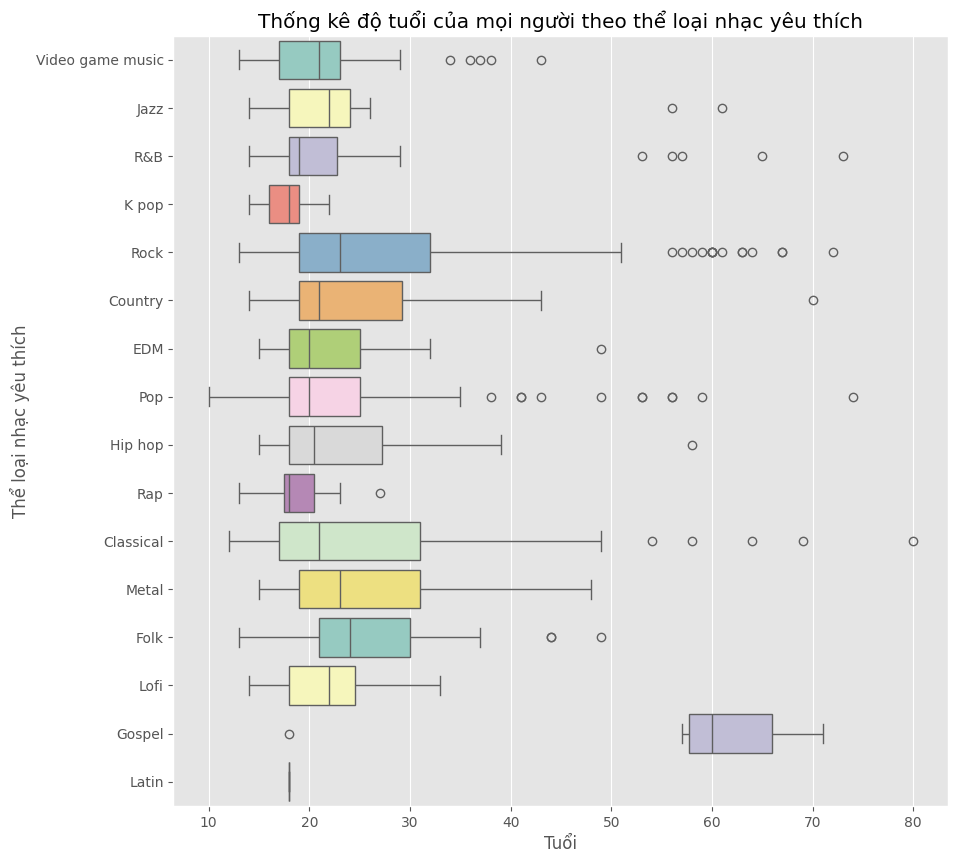

In [18]:
#Vẽ biểu đồ boxplot giữa favorite genres và độ tuổi của tất cả mọi người
fig = plt.figure(figsize=(10, 10))
cmap = plt.get_cmap('Set3')
sns.boxplot(x='Age', y='Fav genre', data=df,  palette=cmap.colors)
plt.title('Thống kê độ tuổi của mọi người theo thể loại nhạc yêu thích')
plt.xlabel('Tuổi')
plt.ylabel('Thể loại nhạc yêu thích')
plt.savefig('images/Q3-age_fav_genre.png', dpi=300)
plt.show()

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>
Các thể loại như Video game music và Jazz có sự phân bố độ tuổi rộng, chỉ ra rằng chúng được nghe bởi một lượng người nghe đa dạng về tuổi tác.
Rock và Pop có nhiều điểm ngoại lệ, cho thấy có người nghe ở độ tuổi cao hơn so với phần lớn người nghe thể loại này.
Thể loại như Classical và Metal có sự phân bố tuổi tương đối hẹp, chỉ ra rằng đối tượng nghe nhạc có xu hướng tập trung vào một nhóm tuổi nhất định.
Lofi và Gospel có những người nghe ở độ tuổi thấp, dựa vào vị trí của hộp và độ rộng của nó.
Latin music dường như có số lượng người nghe ít nhất và có phân bố tuổi hạn chế so với các thể loại khác.
</b></font>
</div>

- Có vẻ như số lượng người tham gia không khảo sát được toàn bộ các độ tuổi. Khó có thể đánh giá theo từng đồ tuổi đươc. Để tiếp tục đánh giá được, chúng ta sẽ chia ra thành các nhóm tuổi
- Vì độ tuổi phân bố khác nhau trong bộ dữ liệu. Nên chúng em quyết định chia độ tổi thành các khoảng dựa theo quantitle của dữ liệu. Chúng em lựa chọn bins là 10 để đánh giá.

In [19]:
# Tạo cột 'Nhóm tuổi' với 10 bins
df['Nhóm tuổi'] = pd.qcut(df['Age'], q=10)
print(df['Nhóm tuổi'].value_counts().sort_index())
print(df['Nhóm tuổi'].dtype)
df.head(3)

Nhóm tuổi
(9.999, 16.0]    80
(16.0, 17.0]     55
(17.0, 18.0]     76
(18.0, 19.0]     57
(19.0, 21.0]     81
(21.0, 23.0]     71
(23.0, 26.0]     61
(26.0, 31.0]     57
(31.0, 40.0]     62
(40.0, 80.0]     66
Name: count, dtype: int64
category


,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Nhóm tuổi
0,18,Spotify,4,No,No,No,Video game music,No,Yes,132,...,Never,Rarely,Rarely,Very frequently,7,7,10,2,No effect,"(17.0, 18.0]"
1,61,YouTube Music,2,Yes,No,Yes,Jazz,Yes,Yes,84,...,Sometimes,Never,Never,Never,9,7,3,3,Improve,"(40.0, 80.0]"
2,18,Spotify,4,Yes,No,No,R&B,Yes,No,107,...,Very frequently,Very frequently,Never,Rarely,7,2,5,9,Improve,"(17.0, 18.0]"


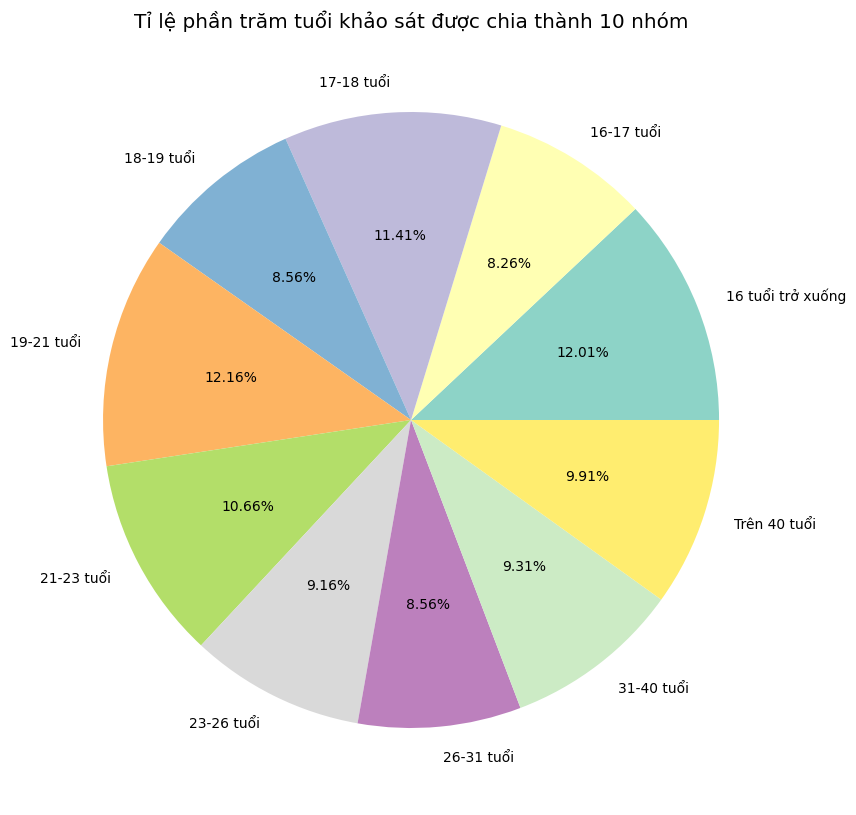

In [20]:
def interval_to_label(interval):
    if interval == pd.Interval(9.999, 16.0, closed='right'):
        return '16 tuổi trở xuống'
    elif interval == pd.Interval(16.0, 17.0, closed='right'):
        return '16-17 tuổi'
    elif interval == pd.Interval(17.0, 18.0, closed='right'):
        return '17-18 tuổi'
    elif interval == pd.Interval(18.0, 19.0, closed='right'):
        return '18-19 tuổi'
    elif interval == pd.Interval(19.0, 21.0, closed='right'):
        return '19-21 tuổi'
    elif interval == pd.Interval(21.0, 23.0, closed='right'):
        return '21-23 tuổi'
    elif interval == pd.Interval(23.0, 26.0, closed='right'):
        return '23-26 tuổi'
    elif interval == pd.Interval(26.0, 31.0, closed='right'):
        return '26-31 tuổi'
    elif interval == pd.Interval(31.0, 40.0, closed='right'):
        return '31-40 tuổi'
    elif interval == pd.Interval(40.0, 80.0, closed='right'):
        return 'Trên 40 tuổi'
    else:
        return 'Khác'

# Chuyển đổi rõ ràng
df['Nhóm tuổi'] = df['Nhóm tuổi'].apply(interval_to_label)
# Cập nhật lại các triệu chứng bệnh 
df_anxiety = df[df['Anxiety'] > 5]
df_depression = df[df['Depression'] > 5]
df_insomnia = df[df['Insomnia'] > 5]
df_ocd = df[df['OCD'] > 5]
df_all_issues = pd.concat([df_anxiety, df_depression, df_insomnia, df_ocd]).drop_duplicates()

# Vẽ biểu đồ tròn tỉ phần trăm tuổi khảo sát được chia thành 10 nhóm
fig, ax = plt.subplots(figsize=(10, 10))
df['Nhóm tuổi'].value_counts().sort_index().plot(kind='pie', autopct='%.2f%%', ax=ax, colormap = 'Set3')
ax.set_ylabel('')
ax.set_title('Tỉ lệ phần trăm tuổi khảo sát được chia thành 10 nhóm')
plt.savefig('images/Q3-age_percentage.png', dpi=300)
plt.show()

C:\Users\huynh\AppData\Local\Temp\ipykernel_4384\423764280.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Nhóm tuổi', 'Fav genre']).size().unstack(fill_value=0)


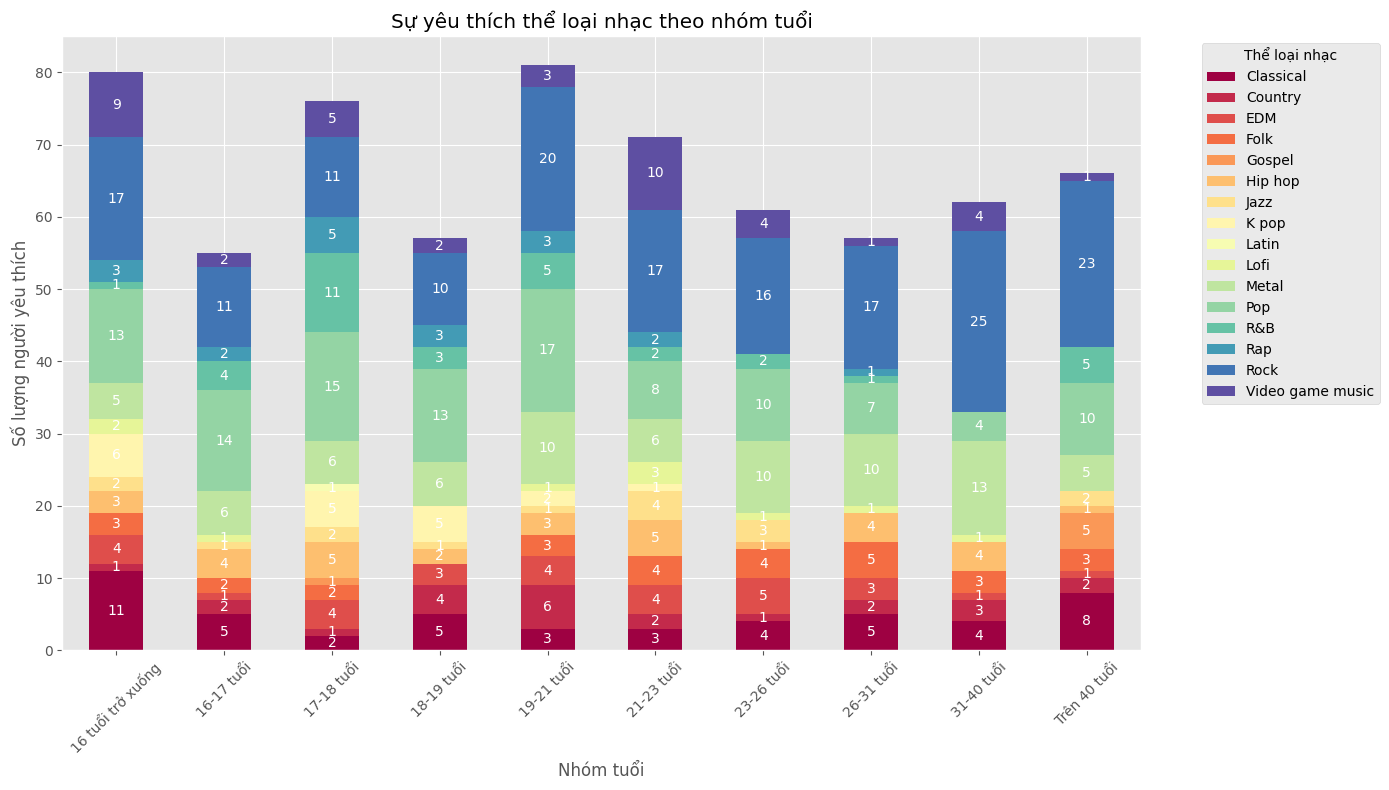

In [21]:
# Biểu đồ stacked bar chart cho sự yêu thích thể loại nhạc theo nhóm tuổi
grouped = df.groupby(['Nhóm tuổi', 'Fav genre']).size().unstack(fill_value=0)

# Vẽ biểu đồ stacked bar chart
ax = grouped.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Spectral')

# Thêm các giá trị 
for c in ax.containers:
    # Optional: if the segment is small, make the text color match the segment color to enhance readability
    labels = [f'{v.get_height():.0f}' if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', color='white')

plt.title('Sự yêu thích thể loại nhạc theo nhóm tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Số lượng người yêu thích')
plt.xticks(rotation=45)
plt.legend(title='Thể loại nhạc', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.savefig('images/Q3-age_fav_genre_stacked.png', dpi=300)
plt.show()

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>
- Phân bố độ tuổi: Có vẻ như mỗi nhóm tuổi có sự yêu thích khác nhau đối với các thể loại nhạc. Thể loại nhạc "Rock" và "Pop" dường như phổ biến trong hầu hết các nhóm tuổi, với số lượng người yêu thích đáng kể. Nhưng thể loại "Rock" thì những người trên 30 tuổi có vẻ như nghe nhiều hơn.

- Thể loại nhạc phổ biến: Thể loại "Video game music" nổi bật trong nhóm tuổi trẻ, trong khi "Classical" được yêu thích bởi nhóm tuổi "Trên 40 tuổi" và nhóm tuổi "Dưới 16"

- Sự đa dạng trong sở thích: Mỗi nhóm tuổi có sự đa dạng trong sở thích âm nhạc của họ, không có thể loại nhạc nào chiếm ưu thế tuyệt đối trong bất kỳ nhóm tuổi nào.

- Ngoại lệ và biến động: Có một số ngoại lệ trong từng nhóm tuổi, như thể hiện qua số lượng người yêu thích nhất định trong các thể loại nhạc khác nhau. Điều này cho thấy sự đa dạng trong sở thích cá nhân không hoàn toàn bị hạn chế bởi độ tuổi.
</b></font>

<font color="red"><b>
=> Tóm lại, biểu đồ cung cấp cái nhìn tổng quan về sự phân bố sở thích âm nhạc qua các nhóm tuổi và cho thấy âm nhạc là một phần của văn hóa đa dạng, với mỗi nhóm tuổi đều có những sở thích riêng biệt và độc đáo của họ.
</b></font>


</div>

Vậy xu hướng thưởng thức âm nhạc của mỗi người có sự khác biệt dựa trên tuổi tác của họ không?
- Chúng ta hãy xem mọi người có nghe nhạc lúc làm việc, chơi nhạc cụ để thưởng thức âm nhạc hay có thói quen sáng tác nhạc như một cách hưởng thụ âm nhạc hay không, và cuối cùng có thích thể loại nước ngoài hay không?
- Ở phần chỉ có 2 xu hướng là có hoặc không nên chúng ta sẽ xem xét sự phân bố của những người tham gia theo đột tuổi.


C:\Users\huynh\AppData\Local\Temp\ipykernel_4384\248109362.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df_binary.groupby('Nhóm tuổi')[binary_columns].mean().astype(float)


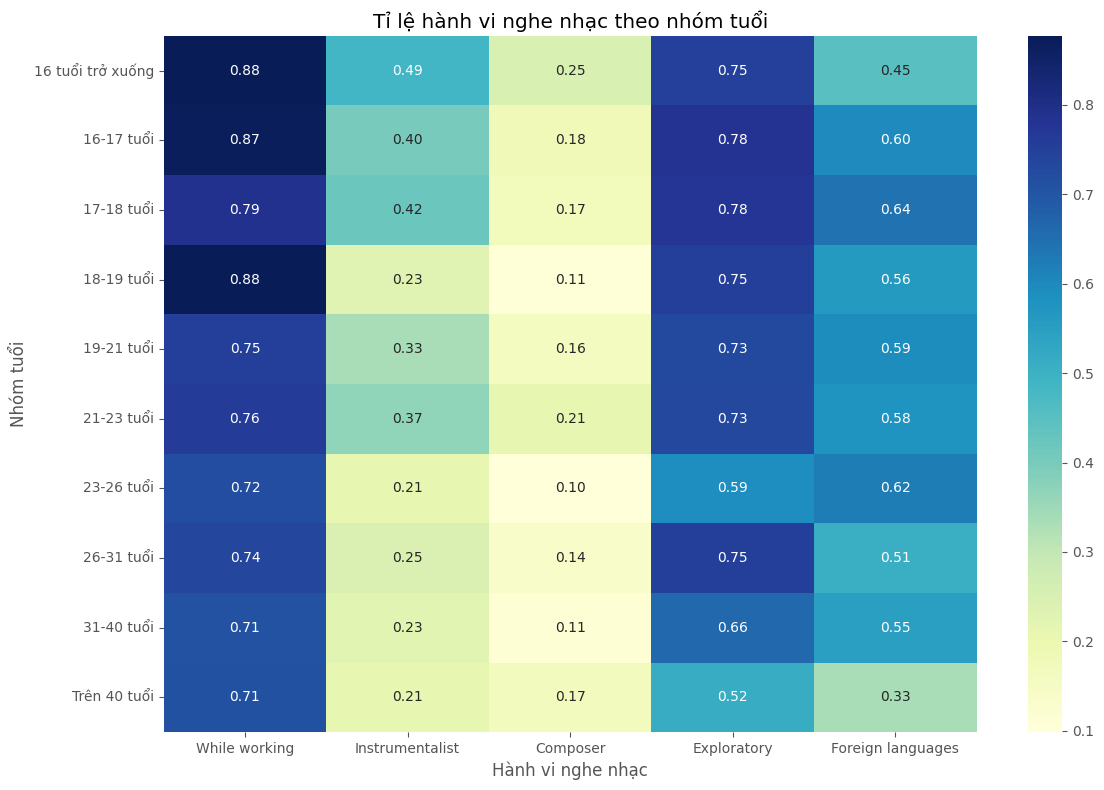

In [22]:
binary_columns = ['While working', 'Instrumentalist', 'Composer', 'Exploratory', 'Foreign languages']
df_binary = df[binary_columns + ['Nhóm tuổi']].copy()  # Tạo một bản sao của slice để tránh cảnh báo
for col in binary_columns:
    df_binary.loc[:, col] = df_binary[col].map({'Yes': 1, 'No': 0})

# Nhóm theo tuổi và tinb mean để biểu thị cho tập dữ liệu
heatmap_data = df_binary.groupby('Nhóm tuổi')[binary_columns].mean().astype(float)

# Biểu đồ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu")

plt.title('Tỉ lệ hành vi nghe nhạc theo nhóm tuổi')
plt.xlabel('Hành vi nghe nhạc')
plt.ylabel('Nhóm tuổi')
plt.tight_layout()
plt.savefig('images/Q3-age_binary_heatmap.png', dpi=300)
plt.show()



<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>
- Tỉ lệ những người đang làm việc ("While working") khá cao qua tất cả các nhóm tuổi, đặc biệt là nhóm "16 tuổi trở xuống" và "18-19 tuổi" với tỉ lệ cao nhất.
- Nhóm "16-17 tuổi" và "17-18 tuổi" có tỉ lệ cao những người chơi nhạc cụ ("Instrumentalist") và sáng tác nhạc ("Composer"), nhưng tỉ lệ này giảm dần ở các nhóm tuổi lớn hơn.
- Hoạt động khám phá các nghệ sĩ thể loại nhạc  ("Exploratory") sau khi nghe có tỉ lệ thấp nhất ở nhóm "Trên 40 tuổi", cho thấy sự giảm nhu cầu hoặc sự quan tâm đến hoạt động khám phá ở nhóm tuổi này.
- nghe nhạc nước ngoài ("Foreign languages") được quan tâm nhiều ở nhóm tuổi trẻ, đặc biệt là nhóm "16-17 tuổi" với tỉ lệ cao nhất, và tỉ lệ này giảm dần khi tuổi tác tăng lên.
</b></font>
</div>

***Vậy theo tứng mức tuổi thì nhóm nào dễ bị có những triệu chứng tâm lý hơn?***

Nhóm tuổi
16 tuổi trở xuống    65
16-17 tuổi           41
17-18 tuổi           58
18-19 tuổi           37
19-21 tuổi           66
21-23 tuổi           63
23-26 tuổi           50
26-31 tuổi           48
31-40 tuổi           51
Trên 40 tuổi         35
Name: count, dtype: int64


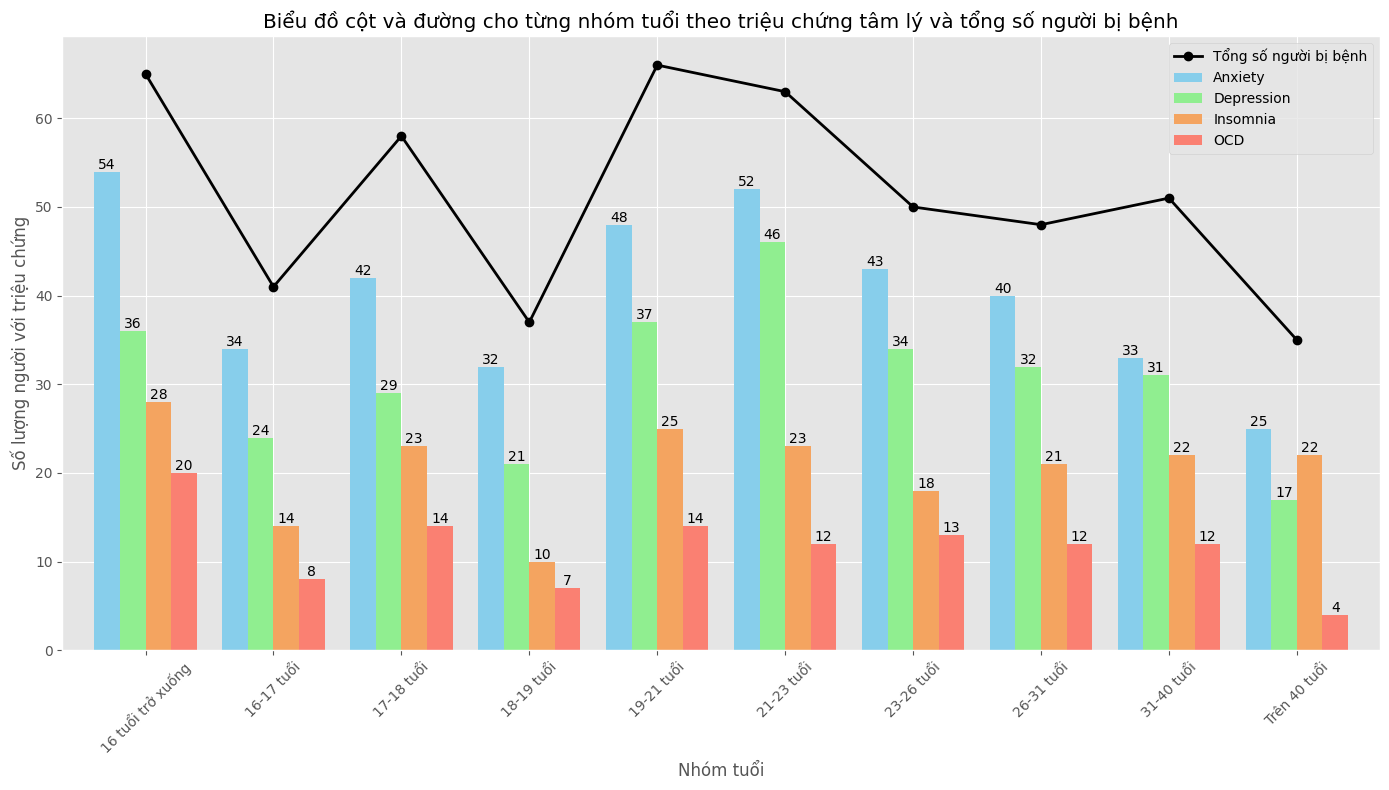

In [23]:
# Biểu đồ cột 4 cho từng nhóm tuổi để thể hiện điều này.
age_groups = df['Nhóm tuổi'].unique().sort_values()
# Dữ liệu nhóm tuổi
count_mh_age = {mental_health: [] for mental_health in mental_healths}

# Tống số lượng vấn đề theo độ tuổi
total_issues_by_age = df_all_issues['Nhóm tuổi'].value_counts().sort_index()
print(total_issues_by_age)
# Đếm số lượng mỗi loại triệu chứng cho từng nhóm tuổi
for group in age_groups:
    count_mh_age['Anxiety'].append(len(df_anxiety[df_anxiety['Nhóm tuổi'] == group]))
    count_mh_age['Depression'].append(len(df_depression[df_depression['Nhóm tuổi'] == group]))
    count_mh_age['Insomnia'].append(len(df_insomnia[df_insomnia['Nhóm tuổi'] == group]))
    count_mh_age['OCD'].append(len(df_ocd[df_ocd['Nhóm tuổi'] == group]))

# Create a DataFrame from the collected data
df_count_mh_age = pd.DataFrame(count_mh_age, index=age_groups)

# Plotting
ax = df_count_mh_age.plot(kind='bar', figsize=(14, 8), width=0.8, color=custom_colormap)

# Plot the line for total issues by age group on the same Axes object
total_issues_by_age.plot(ax=ax, marker='o', color='black', linewidth=2, label='Tổng số người bị bệnh')

# Title and labels
plt.title('Biểu đồ cột và đường cho từng nhóm tuổi theo triệu chứng tâm lý và tổng số người bị bệnh')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Số lượng người với triệu chứng')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Thêm số lượng vào các cột
for container in ax.containers:
    ax.bar_label(container)

plt.legend()
plt.tight_layout()
plt.savefig('images/Q3-age_mental_health.png', dpi=300)
plt.show()

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>
- Nhìn vào biểu đồ cho thấy rằng tổng số lượng triệu chứng tâm lý theo từng nhóm tuổi cùng với đó là số lượng từng loại bệnh. 
- Biểu đồ nhìn chung, giai đoạn tuổi từ 16 đến 21 tuổi, khi tâm lý chưa vững vàng, con người có thể xuất hiện nhiều triệu chứng tâm lý nhất và biến động không thể kiểm soát đươc. 
- Số lượng người bị các vấn đề về Lo lắng, Mất ngủ và OCD lại xuất hiện nhiều nhất ở những bạn dưới 16 tuổi (điều này có vẻ không hợp lý) 
- ở độ tuổi từ 19-23 tuổi, dường như các vấn đề xuất hiện nhiều nhất là Trầm cảm và Lo lắng. Đây là điều dễ hiểu vì đây là giai đoạn mà con người bắt đầu có những áp lực lớn về học tập, công việc, tương lai, tình cảm,..
- Dần về sau thì những người bị các triệu chứng thì ít hơn theo độ tuổi. Điều này có thể hiểu là khi con người trưởng thành, có thể tự kiểm soát được tâm lý của mình hơn.

</b></font>

<font color="red"><b>
=> tổng số lượng người có vấn để tâm lý cũng xuất hiện nhiều nhất ở những người 16 tuổi trở xuống, sau đó là độ tuổi từ 19-23. Điều này cho thấy rằng các bệnh đang dần trẻ hóa đi, và đặt ra mối quan tâm đến tâm lý ở những bạn trẻ nhiều hơn.
Nếu không điều trị sớm có thể dẫn đến những hậu quả khó lường
</b></font>


</div>

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>Câu 3: Số nhịp điệu của dòng dòng nhạc yêu thích có ảnh hưởng tới sức khỏe tinh thần của họ hay không  </b></font>

<font color="red"><b>Câu hỏi có lợi ích gì:  </b></font> <font color="red"></font>

</div>

In [24]:
df['BPM'].describe().T

count    666.000000
mean     121.981982
std       26.927689
min       55.000000
25%      105.000000
50%      120.000000
75%      139.750000
max      192.000000
Name: BPM, dtype: float64

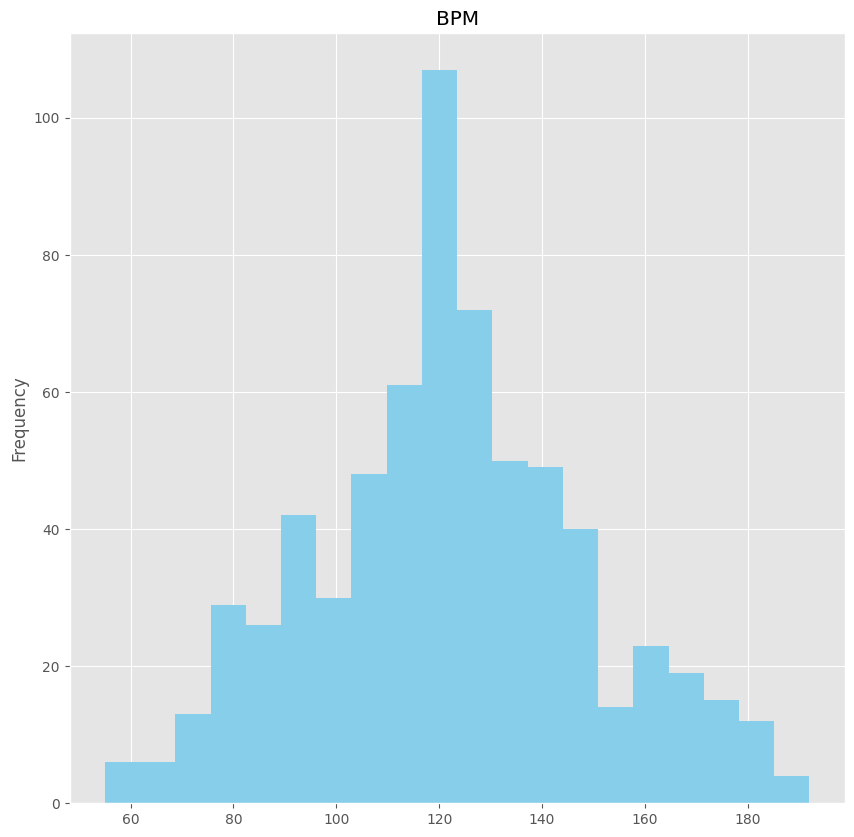

In [25]:
plt.figure(figsize = (10, 10))
df['BPM'].plot(kind = 'hist', bins = 20, color = 'skyblue')
plt.title('BPM')
plt.savefig('images/Q4-BPM-histogram.png', dpi=300)
plt.show()

***Cột BPM là số nhịp điệu trung bình của các bài hát mà người đó thích. Liệu dựa vào đó chúng ta có thể thống kê được số nhịp điệu của mỗi dòng nhạc yêu thích không?*** 

C:\Users\huynh\AppData\Local\Temp\ipykernel_4384\3452674040.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fav genre', y='BPM', data=df,  palette='Set3')


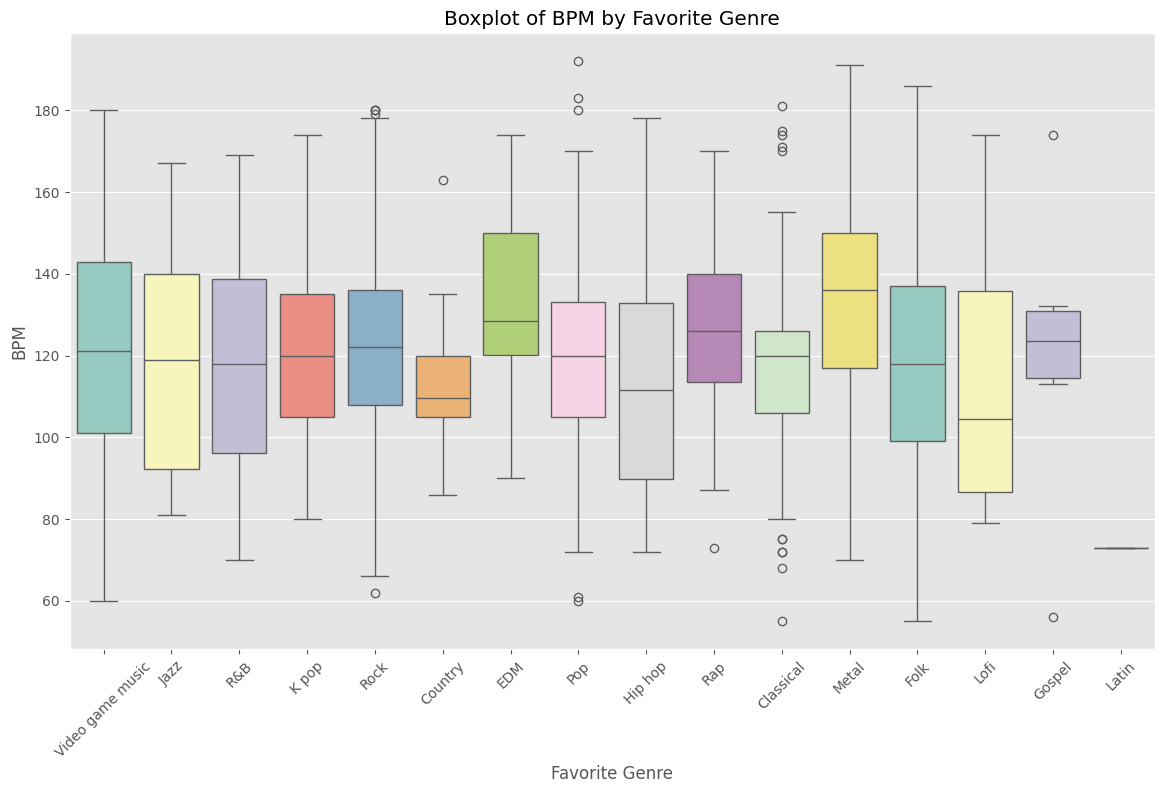

In [26]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Fav genre', y='BPM', data=df,  palette='Set3')
plt.xticks(rotation=45)
plt.title('Boxplot of BPM by Favorite Genre')
plt.ylabel('BPM')
plt.xlabel('Favorite Genre')
plt.savefig('images/Q4-BPM-Favgen-boxplot.png', dpi=300)
plt.show()

In [27]:
# Lập bảng thống kê theo từng thể loại nhạc
df_genre = df.groupby('Fav genre')['BPM'].agg([
    'mean', 
    'count', 
    'min', 
    'max', 
    'median', 
    (lambda x: x.quantile(0.25)),  # 25th percentile
    (lambda x: x.quantile(0.75))   # 75th percentile
]).rename(columns={
    '<lambda_0>': 'quantile_25', 
    '<lambda_1>': 'quantile_75'
}).sort_values(by='mean', ascending=False)
df_genre

,mean,count,min,max,median,quantile_25,quantile_75
Fav genre,,,,,,,
Metal,134.246753,77,70,191,136.0,117.00,150.00
EDM,133.066667,30,90,174,128.5,120.25,150.00
Rap,126.526316,19,73,170,126.0,113.50,140.00
K pop,123.842105,19,80,174,120.0,105.00,135.00
Rock,122.251497,167,62,180,122.0,108.00,136.00
Video game music,121.634146,41,60,180,121.0,101.00,143.00
Gospel,120.333333,6,56,174,123.5,114.50,131.00
Pop,119.738739,111,60,192,120.0,105.00,133.00
Classical,118.380000,50,55,181,120.0,106.00,126.00


<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>

Dựa vào biểu đồ và những dữ liệu chi tiết có thể thấy rõ sự phân chia nhịp độ trung bình (BPM) giữa các thể loại nhạc:

- Nhóm Nhịp Độ Cao: Metal và EDM đứng đầu danh sách với BPM trung bình cao nhất, cho thấy đây là các thể loại nhạc có năng lượng và độ sôi động rất cao.

- Nhóm Nhịp Độ Trung Bình đến Cao: Rap, K pop, Rock, và Video game music có BPM trung bình từ khoảng 120 đến 126, cho thấy những thể loại này thường có nhịp điệu nhanh và phù hợp với nhu cầu giải trí đa dạng.

- Nhóm Nhịp Độ Trung Bình đến Thấp: Gospel, Pop, Classical, R&B, Jazz, Folk  và Hip hop có BPM trung bình nằm trong khoảng từ khoảng 115 đến 120. Các thể loại này có thể bao gồm cả bản nhạc nhanh và chậm, phản ánh sự đa dạng trong cách biểu đạt và cảm xúc trong âm nhạc.

- Nhóm Nhịp Độ Thấp:Lofi và Country có BPM trung bình dưới 115 BPM, thấp hơn các thể loại kể trên, điều này phản ánh tính chất nhẹ nhàng và tình cảm của thể loại nhạc này.

- Đáng chú ý: Latin chỉ có một bài hát được đưa vào dữ liệu với BPM là 73, có thể không đại diện cho toàn bộ thể loại nhạc Latin.
</b></font>

<font color="red"><b>
=> Nói chung, BPM trung bình phản ánh không chỉ phong cách và đặc trưng của các thể loại nhạc mà còn cho thấy sở thích và xu hướng của người nghe nhạc. Thể loại nhạc có BPM cao thường liên quan đến năng lượng và sự hứng khởi, trong khi thể loại nhạc có BPM thấp hơn mang lại không gian tĩnh lặng và sâu lắng hơn.
</b></font>


</div>

In [28]:


# Encode 'Fav genre' to numeric values
le = LabelEncoder()
df['Fav genre encoded'] = le.fit_transform(df['Fav genre'])
print(le.classes_)

['Classical' 'Country' 'EDM' 'Folk' 'Gospel' 'Hip hop' 'Jazz' 'K pop'
 'Latin' 'Lofi' 'Metal' 'Pop' 'R&B' 'Rap' 'Rock' 'Video game music']


C:\Users\huynh\AppData\Local\Temp\ipykernel_4384\2905275916.py:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


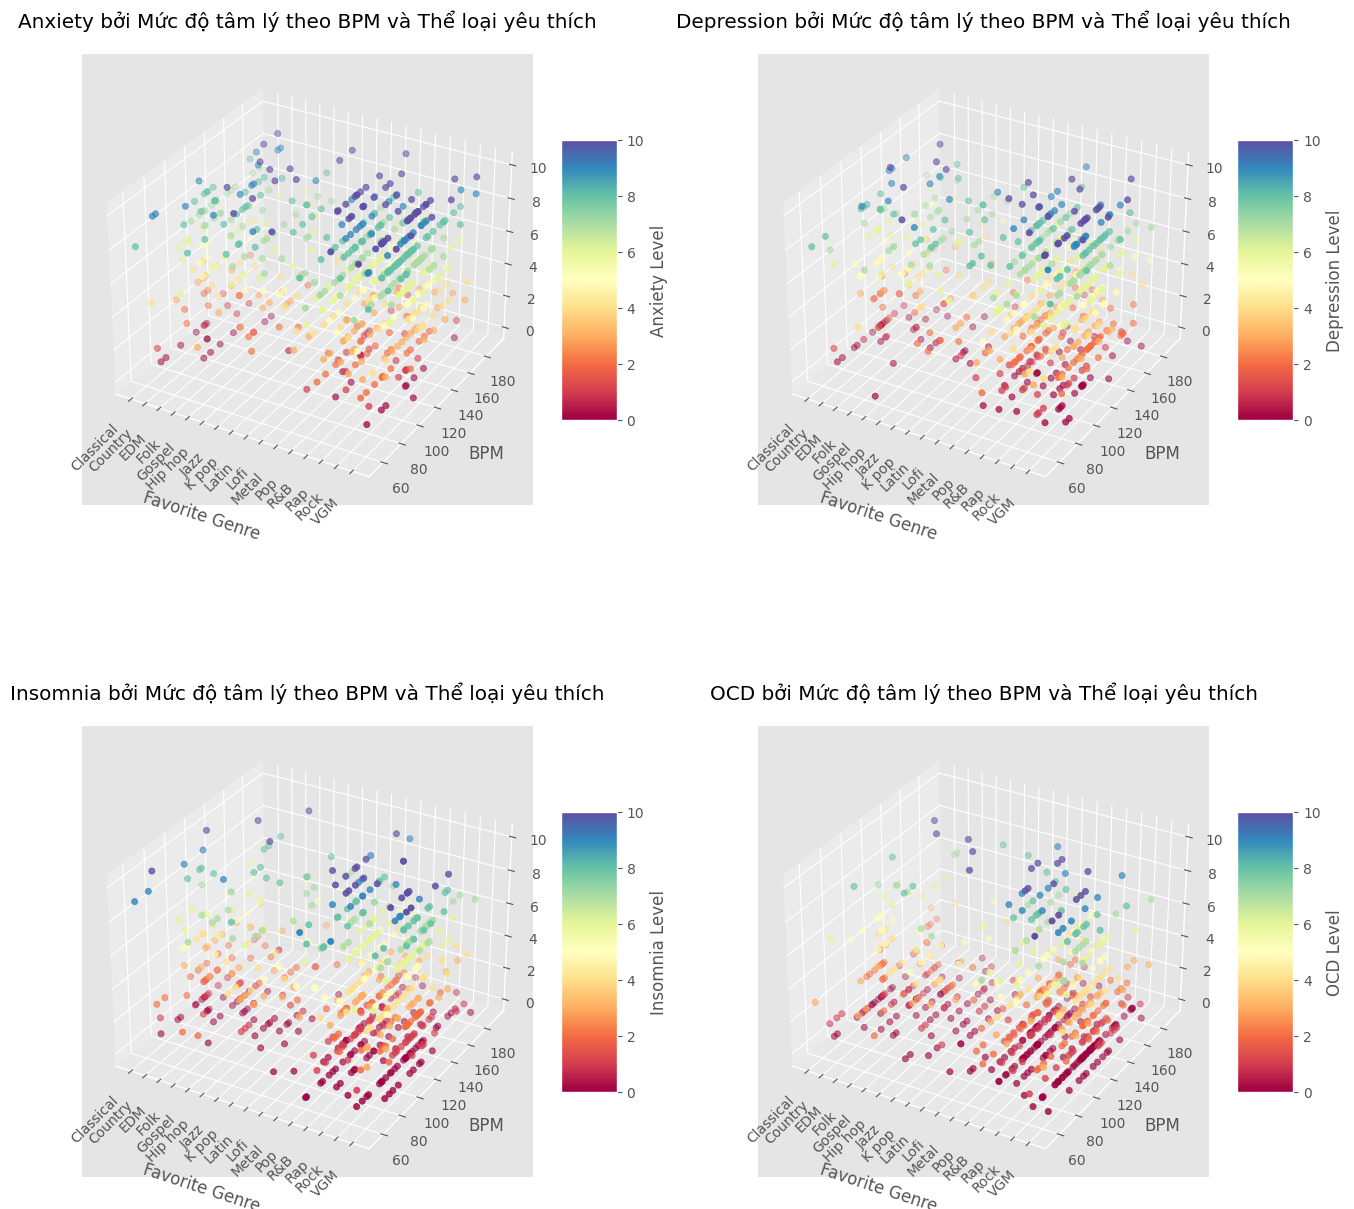

In [29]:
# Với nhãn Video game music khá là dài nên thay thế bằng VGM
genre_labels = [genre if genre != "Video game music" else "VGM" for genre in le.classes_]

fig = plt.figure(figsize=(16, 16))

# Với mỗi loại bệnh vẽ một biểu đồ scatter 3D
for index, condition in enumerate(mental_healths, start=1):
    ax = fig.add_subplot(2, 2, index, projection='3d')
    
   # Vẽ biểu đồ scatter 3D
    sc = ax.scatter(df['Fav genre encoded'], df['BPM'], df[condition], c=df[condition], cmap='Spectral')
    
    ax.set_xlabel('Favorite Genre', labelpad=20)
    ax.set_ylabel('BPM', labelpad=10)
    ax.set_zlabel(f'{condition} Mức độ', labelpad=10)
    ax.set_title(f'{condition} bởi Mức độ tâm lý theo BPM và Thể loại yêu thích', pad=20)
    
    # Thiết lập các nhãn dữ liệu cho trục x đã labeled
    ax.set_xticks(range(len(genre_labels)))
    ax.set_xticklabels(genre_labels, rotation=45, ha='right')
    
    fig.colorbar(sc, ax=ax, shrink=0.5, aspect=5, label=f'{condition} Level')

plt.tight_layout()
plt.savefig('images/Q4-scatter3D-mental_health_bpm_genre.png', dpi=300)
plt.show()

<div style="border-radius: 10px; border: 2px solid #51F9F4; padding: 15px; background-color:#c2eeec; font-size: 100%; text-align: left;">
    
<font size="+1" color=#215C67><b>
- Ở các người tham gia có xu hướng Lo lắng và Trầm Cảm cao dể dàng nhận thấy rằng họ thường nghe những loại nhạc Rock, Rap, Metal,Pop,  R&B, Rap, Rock. Ở mức BPm trên 120 thì họ sẽ có nhiều triệu chứng hơn. Nhưng trái ngược lại họ ít có cảm giác đốt với các triệu chứng Mất ngủ hay OCD.

- Riêng thể loại nhạc EDM tuy có xung nhịp cao nhưng rất ít người yêu thích thể loại nhạc đó cảm thấy có vấn đề đối với trạng thái tinh thần của mình so với những thể loại nhạc có cùng xung nhịp khác.
</b></font>

<font color="red"><b>
=> Thể loại nhạc và xung nhịp của loại nhạc đó cũng có một tác động lớn đến các vấn đề tâm lý. Nhìn vào biểu đồ có thể thấy những loại nhạc có mức độ xung nhịp trên 120 có thể ảnh hưởng đến tinh thần của mọi người, khiên cho mọi người cảm thấy bất an, lo âu và có xu hướng xuất hiện cái triệu chứng tinh thần thường xuyên hơn.
</b></font>

</div>